In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
data = pd.read_csv('../data/processed/full_dataset.csv')

In [3]:
data.set_index('date', inplace=True)
data

,Average,Day,Week,Month,Year,Quarter,Holiday,temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum,wind_speed_10m_max,shortwave_radiation_sum,et0_fao_evapotranspiration
date,,,,,,,,,,,,,,
2013-06-16,20.5,16,24,6,2013,2,0,22.0,18.8,20.4,41.7,7.6,5.65,1.27
2013-06-17,20.5,17,25,6,2013,2,1,24.0,19.2,21.4,9.6,6.4,16.08,3.14
2013-06-18,19.5,18,25,6,2013,2,0,24.9,19.4,21.7,11.0,7.4,14.58,2.99
2013-06-19,20.5,19,25,6,2013,2,0,22.0,19.2,20.3,100.1,5.4,3.96,0.97
2013-06-20,20.5,20,25,6,2013,2,0,25.1,17.7,21.0,3.4,6.6,19.90,3.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-09,36.5,9,18,5,2021,2,0,22.2,14.5,18.1,3.2,9.2,21.30,3.89
2021-05-10,36.5,10,19,5,2021,2,0,22.2,14.6,18.2,5.0,5.4,18.96,3.52
2021-05-11,36.5,11,19,5,2021,2,0,22.4,14.5,17.9,3.9,6.9,16.93,3.14


In [4]:
time_series = ['Average', 'temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean',	'precipitation_sum',	'wind_speed_10m_max',	'shortwave_radiation_sum', 'et0_fao_evapotranspiration']

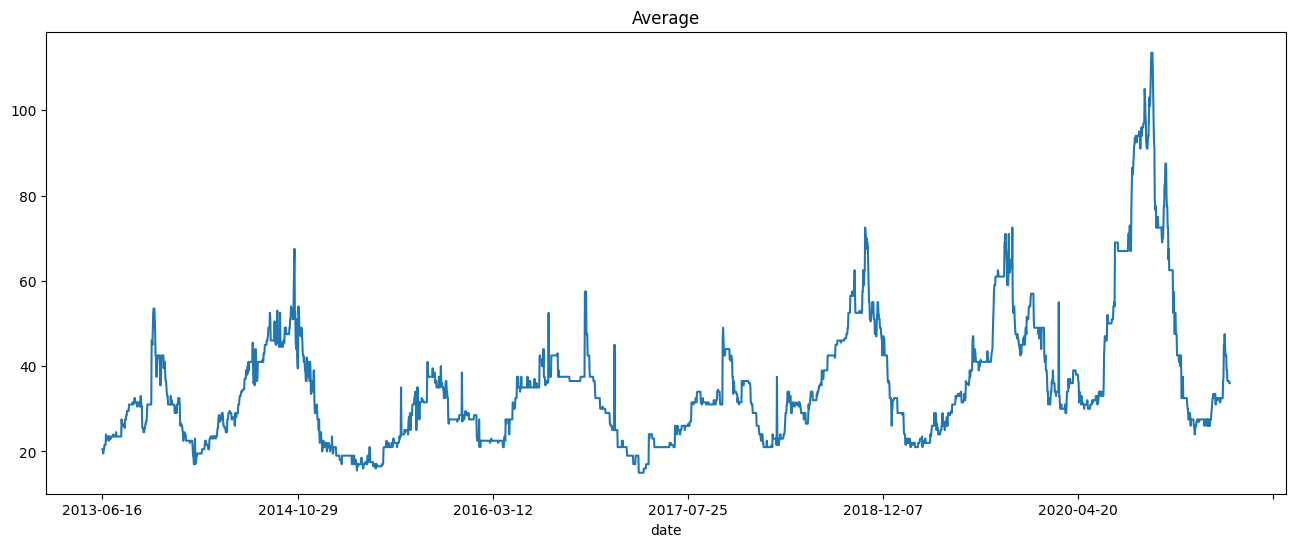

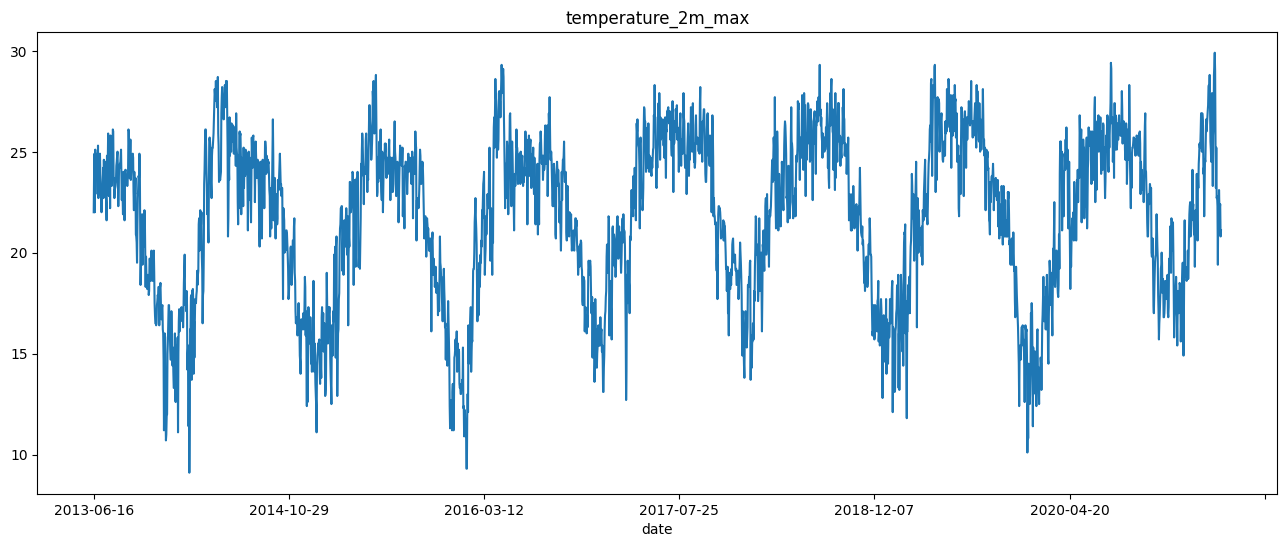

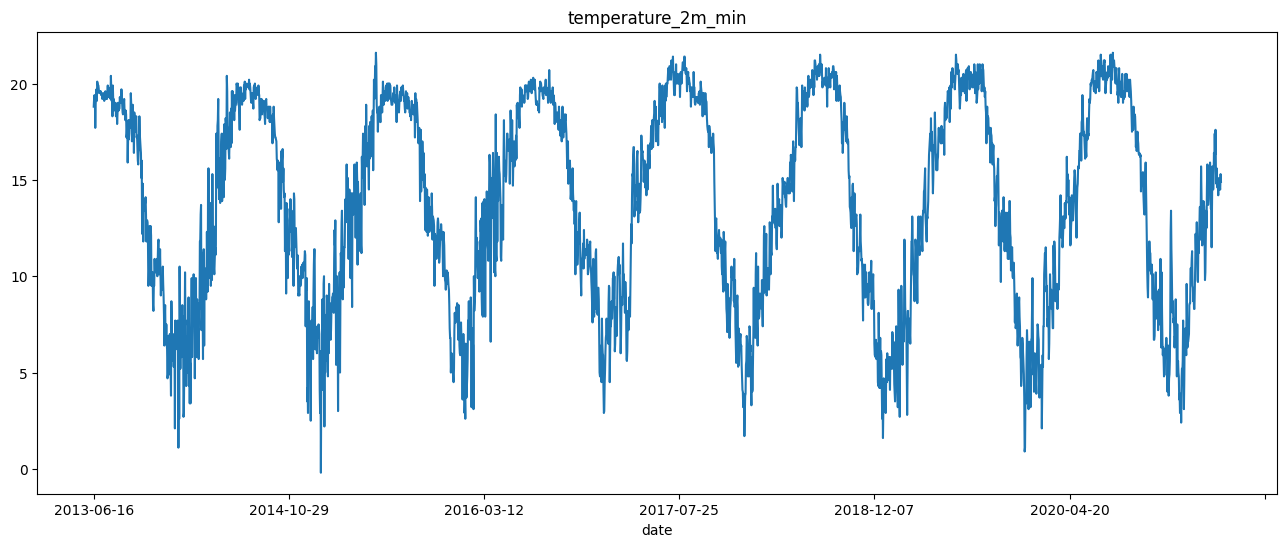

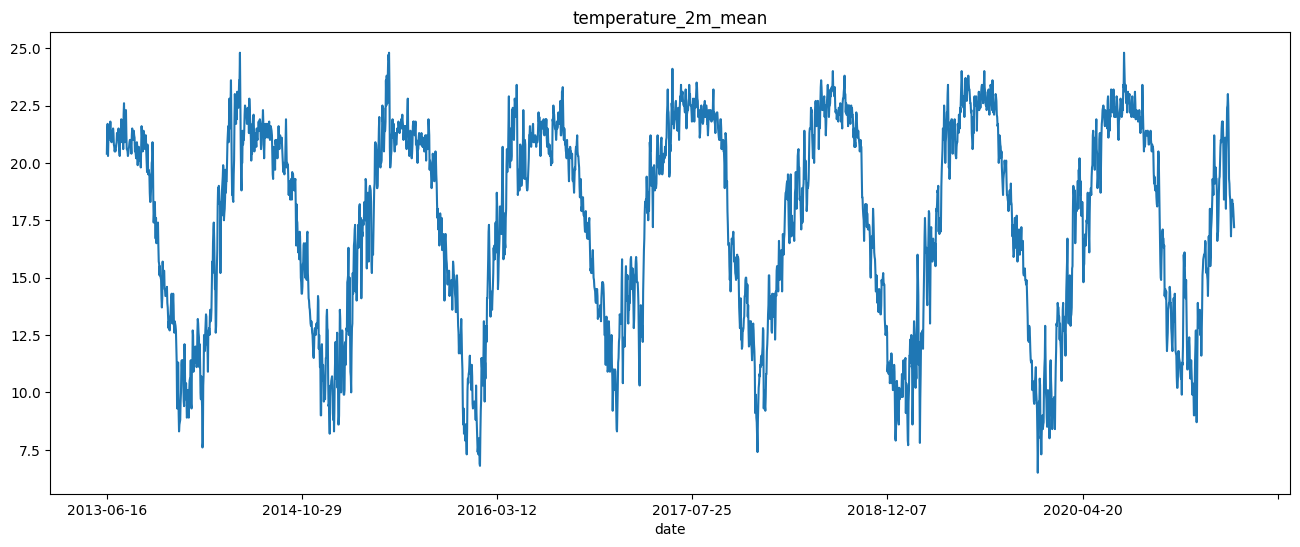

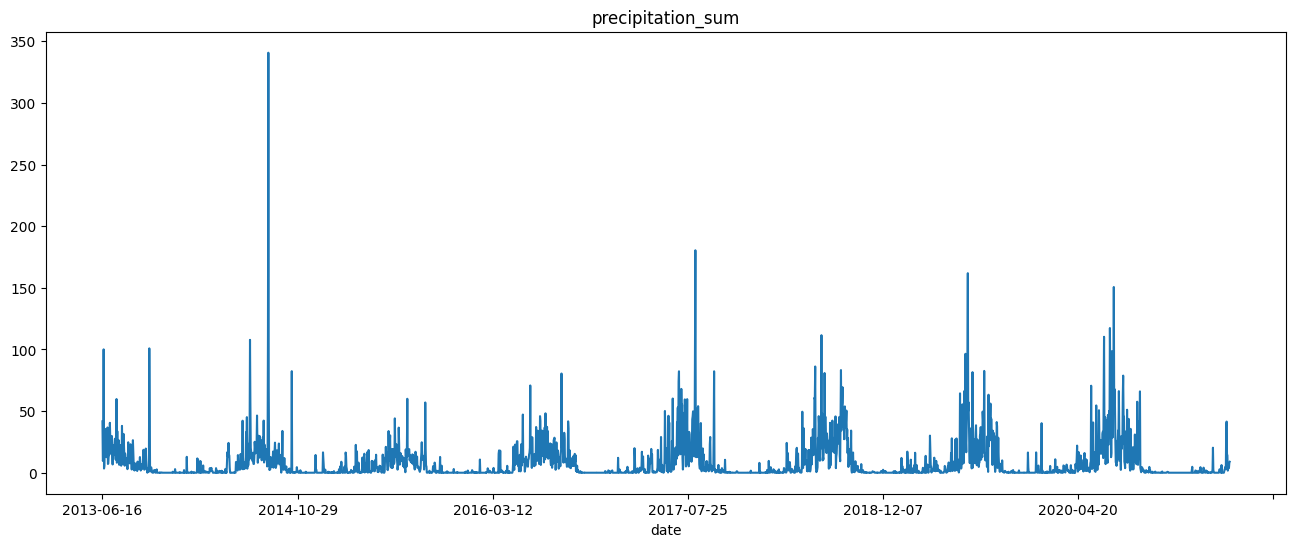

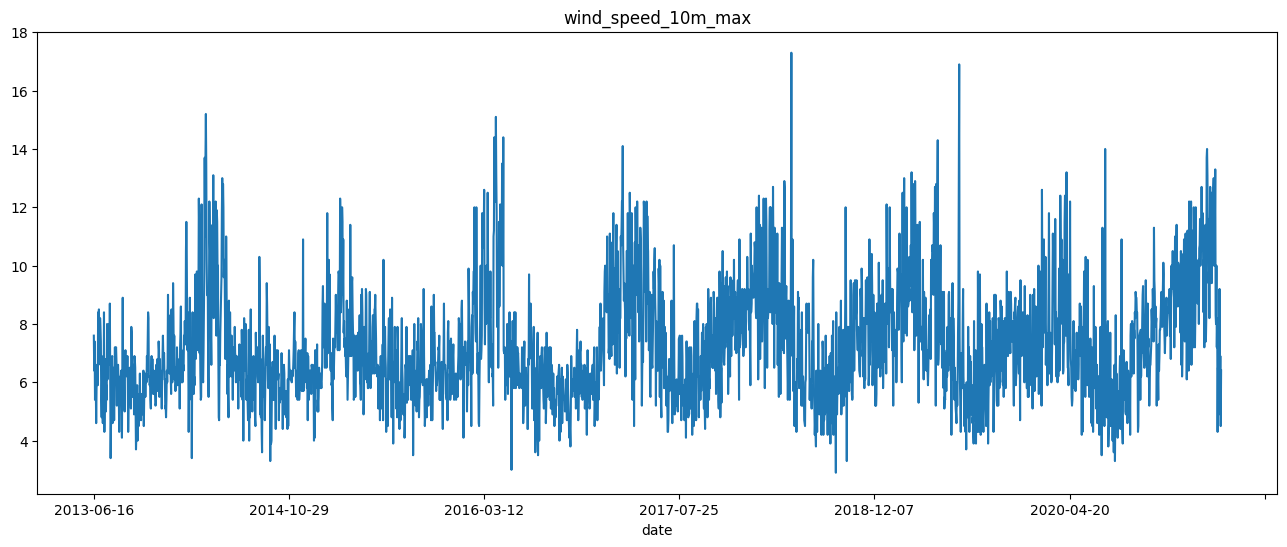

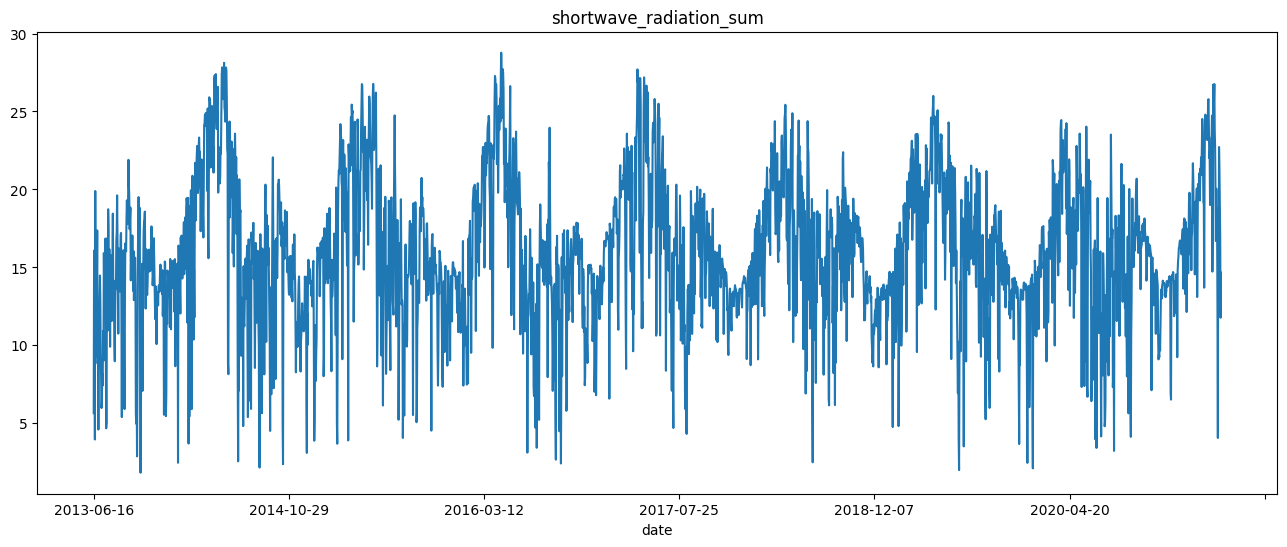

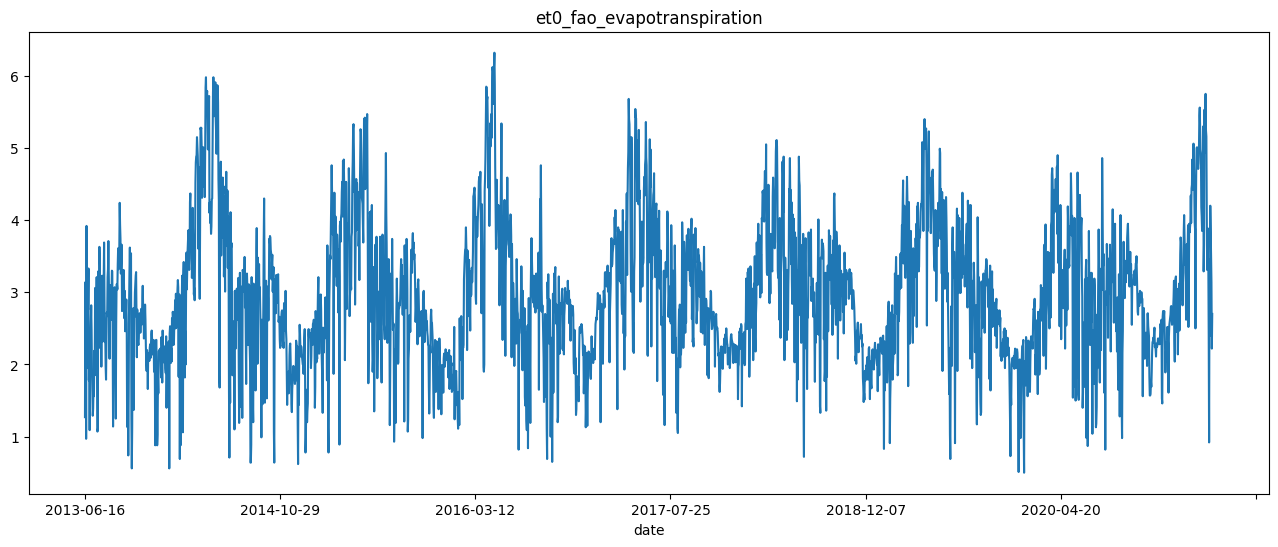

In [5]:
# plot all time series with bigger plots
for ts in time_series:
    data[ts].plot(figsize=(16, 6))
    plt.title(ts)
    plt.show()



In [6]:
# for ts in time_series decompose and save trend, seasonal and residual to variable
trends = {}
seasonals = {}
residuals = {}

# Loop through each column in the DataFrame
for ts in time_series:
    print(f"Decomposing: {ts}")
    
    # Decompose the time series
    result = seasonal_decompose(data[ts], model='additive', period=365)
    
    # Store the results in dictionaries
    trends[ts] = result.trend
    seasonals[ts] = result.seasonal
    residuals[ts] = result.resid

    # Plot the decomposition for each column
    # plt.rcParams['figure.figsize'] = [10, 8] 
    # result.plot()
    # plt.show()

Decomposing: Average
Decomposing: temperature_2m_max
Decomposing: temperature_2m_min
Decomposing: temperature_2m_mean
Decomposing: precipitation_sum
Decomposing: wind_speed_10m_max
Decomposing: shortwave_radiation_sum
Decomposing: et0_fao_evapotranspiration


In [7]:
trend_df = pd.DataFrame(trends)
seasonal_df = pd.DataFrame(seasonals)
residual_df = pd.DataFrame(residuals)

In [8]:
# Check for NaN values in the decomposed components
print("Missing values in trends:\n", trend_df.isnull().sum())
print("Missing values in seasonals:\n", seasonal_df.isnull().sum())
print("Missing values in residuals:\n", residual_df.isnull().sum())

Missing values in trends:
 Average                       364
temperature_2m_max            364
temperature_2m_min            364
temperature_2m_mean           364
precipitation_sum             364
wind_speed_10m_max            364
shortwave_radiation_sum       364
et0_fao_evapotranspiration    364
dtype: int64
Missing values in seasonals:
 Average                       0
temperature_2m_max            0
temperature_2m_min            0
temperature_2m_mean           0
precipitation_sum             0
wind_speed_10m_max            0
shortwave_radiation_sum       0
et0_fao_evapotranspiration    0
dtype: int64
Missing values in residuals:
 Average                       364
temperature_2m_max            364
temperature_2m_min            364
temperature_2m_mean           364
precipitation_sum             364
wind_speed_10m_max            364
shortwave_radiation_sum       364
et0_fao_evapotranspiration    364
dtype: int64


In [9]:
# Fill missing values if necessary
trend_df = trend_df.bfill().ffill()
seasonal_df = seasonal_df.bfill().ffill()
residual_df = residual_df.bfill().ffill()

In [49]:
trend_df

,Average,temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum,wind_speed_10m_max,shortwave_radiation_sum,et0_fao_evapotranspiration
date,,,,,,,,
2013-06-16,28.083562,21.223014,13.378082,17.130137,6.271781,7.028219,16.307178,3.012795
2013-06-17,28.083562,21.223014,13.378082,17.130137,6.271781,7.028219,16.307178,3.012795
2013-06-18,28.083562,21.223014,13.378082,17.130137,6.271781,7.028219,16.307178,3.012795
2013-06-19,28.083562,21.223014,13.378082,17.130137,6.271781,7.028219,16.307178,3.012795
2013-06-20,28.083562,21.223014,13.378082,17.130137,6.271781,7.028219,16.307178,3.012795
...,...,...,...,...,...,...,...,...
2021-05-09,53.686301,23.141918,14.107123,18.208767,10.328219,7.795068,15.744959,3.029041
2021-05-10,53.686301,23.141918,14.107123,18.208767,10.328219,7.795068,15.744959,3.029041
2021-05-11,53.686301,23.141918,14.107123,18.208767,10.328219,7.795068,15.744959,3.029041


In [10]:
# Initialize dictionary for synthetic datasets
synthetic_variations = {}

# Generate variations
for ts in time_series:
    variations = []
    
    synthetic = trend_df[ts] + seasonal_df[ts] + residual_df[ts]
    variations.append(("Original Synthetic", synthetic))

    # 1. Amplify trend
    # Slightly increase the trend component
    amplified_trend = trend_df[ts] * 1.1
    synthetic_v1 = amplified_trend + seasonal_df[ts] + residual_df[ts]
    variations.append(("Amplified Trend", synthetic_v1))

    # 2. Add more noise
    # Increase the noise component to simulate randomness
    added_noise = np.random.normal(0, 2, len(residual_df[ts]))
    synthetic_v2 = trend_df[ts] + seasonal_df[ts] + residual_df[ts] + added_noise
    variations.append(("Increased Noise", synthetic_v2))

    # 3. Reduce seasonality
    # Reduce the seasonal component to simulate weakening periodic effects
    reduced_seasonality = seasonal_df[ts] * 0.7
    synthetic_v3 = trend_df[ts] + reduced_seasonality + residual_df[ts]
    variations.append(("Reduced Seasonality", synthetic_v3))

    # 5. Add anomalies
    # Introduce sudden spikes in the data
    anomalies = np.zeros_like(residual_df[ts])
    anomalies[np.random.choice(len(anomalies), size=10, replace=False)] = np.random.uniform(5, 15, 10)
    synthetic_v5 = trend_df[ts] + seasonal_df[ts] + residual_df[ts] + anomalies
    variations.append(("Added Anomalies", synthetic_v5))

    # 6. Structural break
    # Add an abrupt change in trend in the middle of the data
    structural_break = trend_df[ts].copy()
    break_point = len(structural_break) // 2
    structural_break[break_point:] += np.linspace(0, 5, len(structural_break) - break_point)
    synthetic_v6 = structural_break + seasonal_df[ts] + residual_df[ts]
    variations.append(("Structural Break", synthetic_v6))

    # 7. Seasonal frequency changes
    # Simulate shorter seasonal cycles
    shortened_seasonal = np.tile(seasonal_df[ts][:30], len(seasonal_df[ts]) // 30 + 1)[:len(seasonal_df[ts])]
    synthetic_v7 = trend_df[ts] + shortened_seasonal + residual_df[ts]
    variations.append(("Shortened Seasonality", synthetic_v7))

    # 9. Regime switching
    # Simulate two regimes with different trends
    regime_trend = np.piecewise(
        time_index,
        [time_index < len(time_index) // 2, time_index >= len(time_index) // 2],
        [lambda x: trend_df[ts][:len(trend_df[ts]) // 2] * 1.5,
         lambda x: trend_df[ts][len(trend_df[ts]) // 2:] * 0.5]
    )
    synthetic_v9 = regime_trend + seasonal_df[ts] + residual_df[ts]
    variations.append(("Regime Switching", synthetic_v9))


    synthetic_variations[ts] = variations

In [63]:
time_data = data[['Day', 'Week', 'Month', 'Year', 'Quarter', 'Holiday']]

# Combine variations into new DataFrames
synthetic_datasets = {
    variation_name: pd.concat(
        [time_data, pd.DataFrame({ts: synthetic_variations[ts][idx][1] for ts in time_series})],
        axis=1
    )
    for idx, (variation_name, _) in enumerate(synthetic_variations[data.columns[0]])
}
        

Visualizing dataset: Original Synthetic


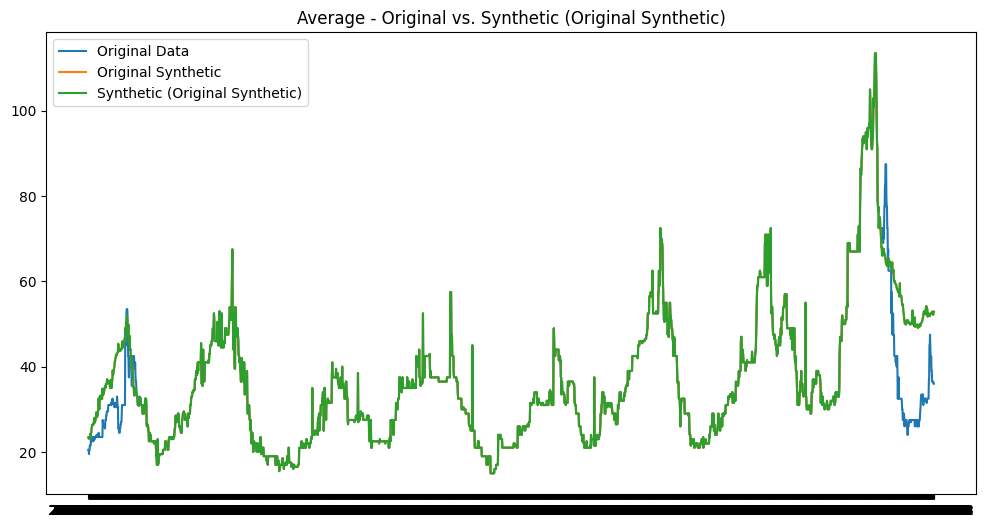

Visualizing dataset: Amplified Trend


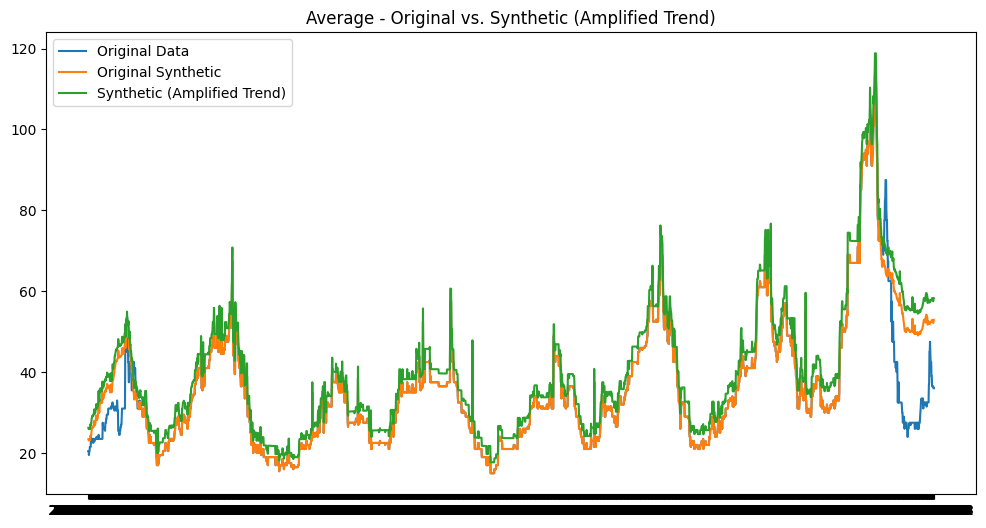

Visualizing dataset: Increased Noise


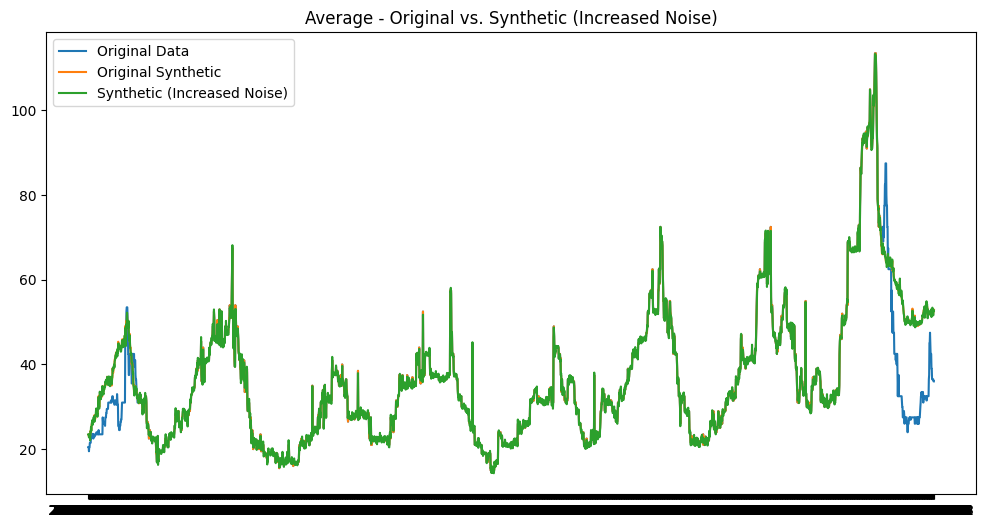

Visualizing dataset: Reduced Seasonality


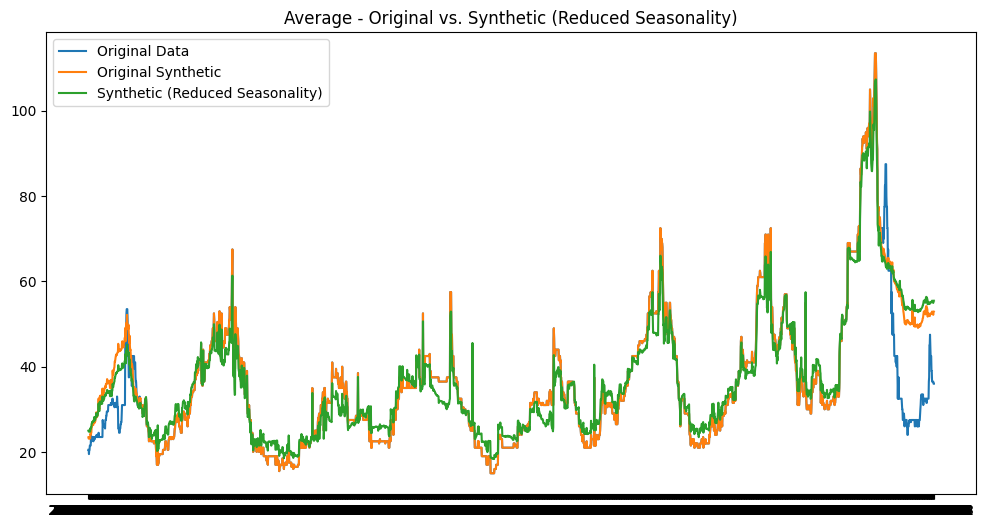

Visualizing dataset: Nonlinear Trend


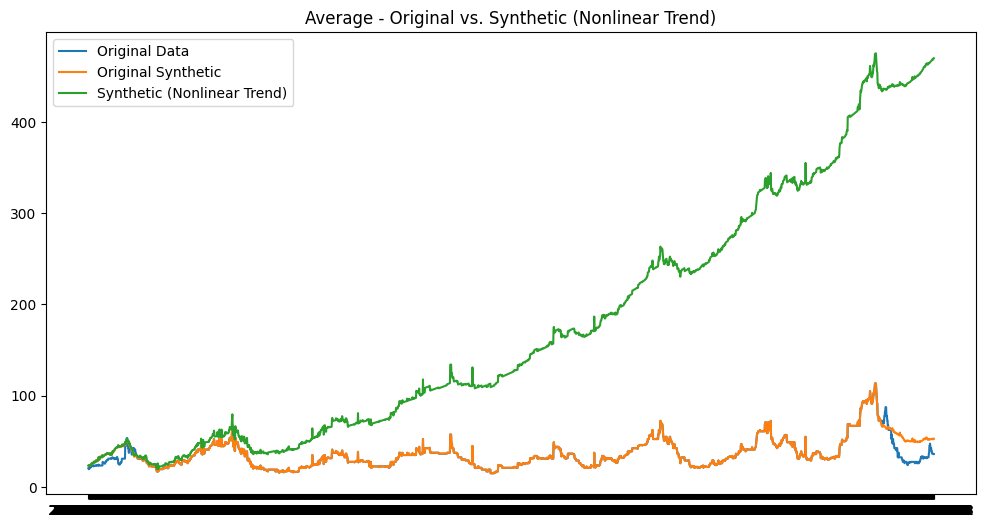

Visualizing dataset: Added Anomalies


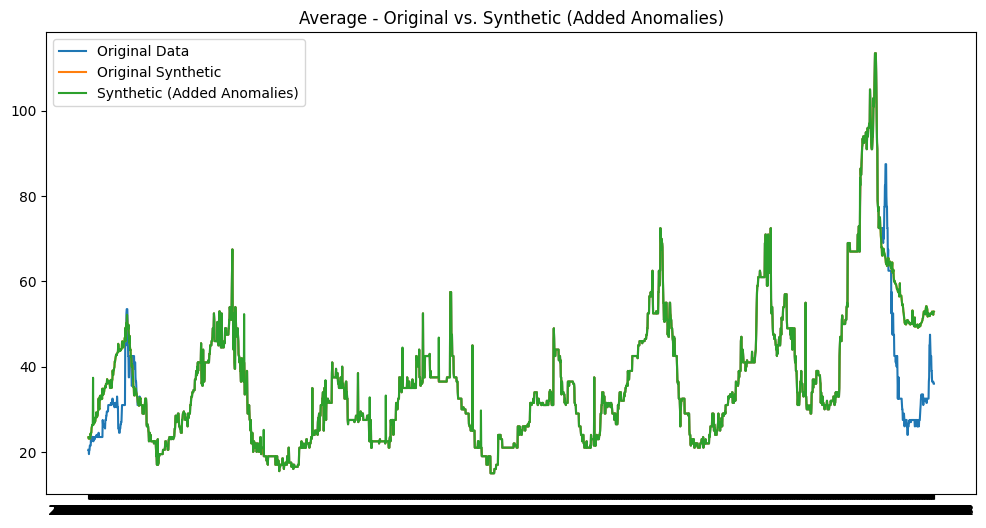

Visualizing dataset: Structural Break


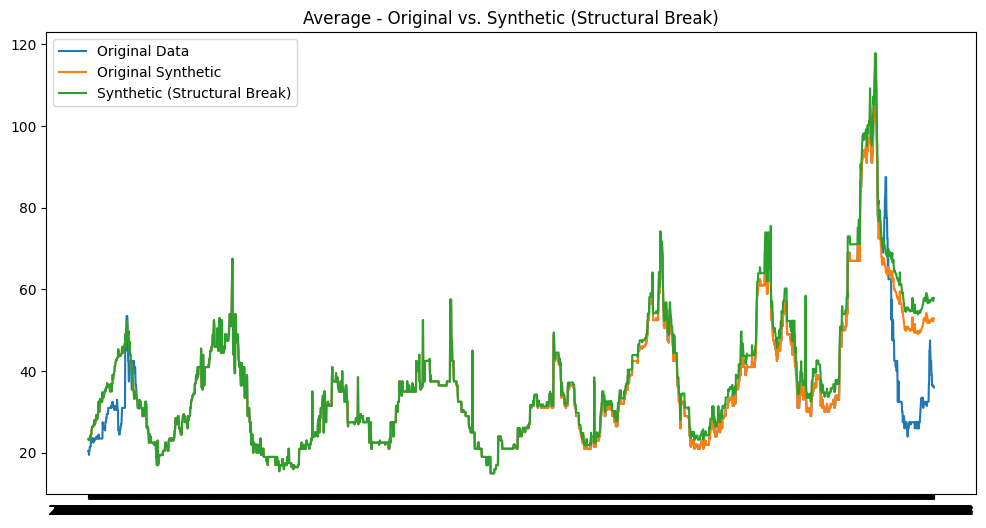

Visualizing dataset: Shortened Seasonality


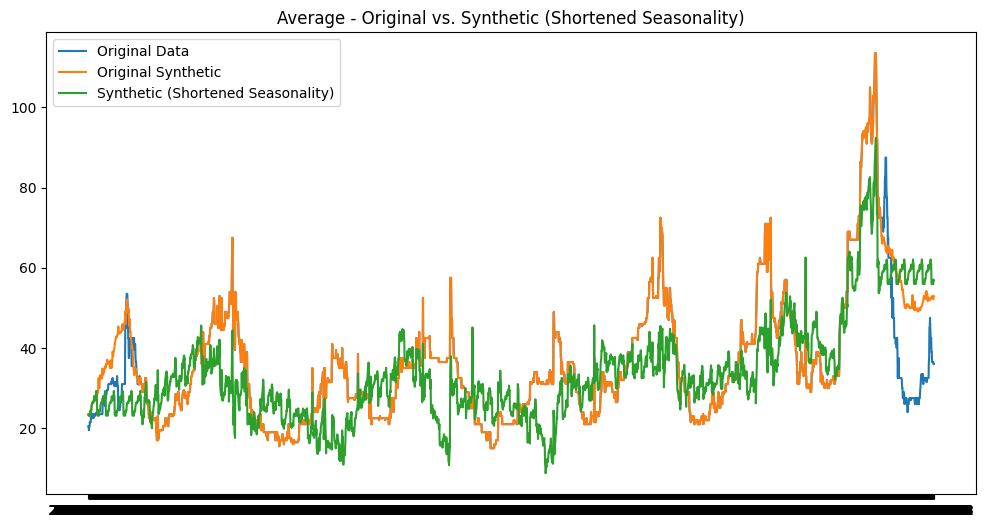

Visualizing dataset: Non-Stationary Variance


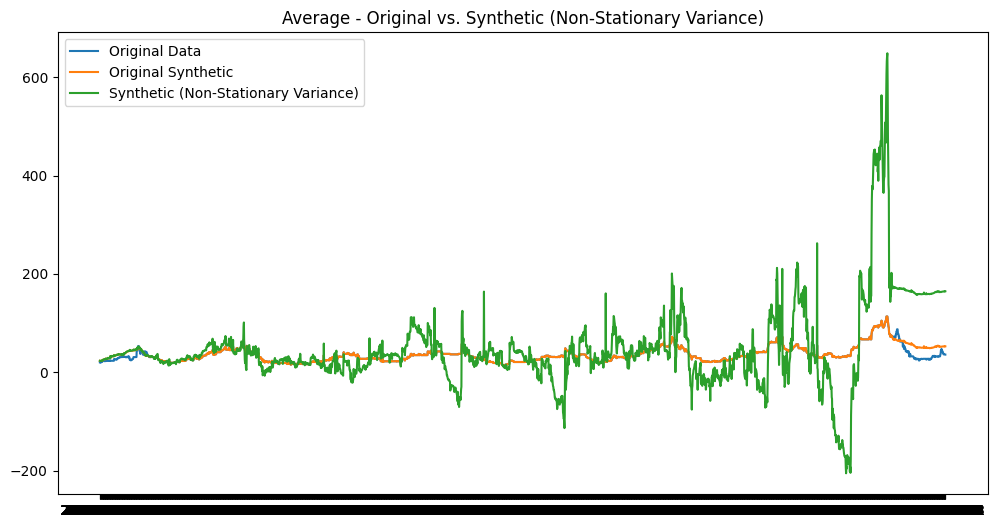

Visualizing dataset: Regime Switching


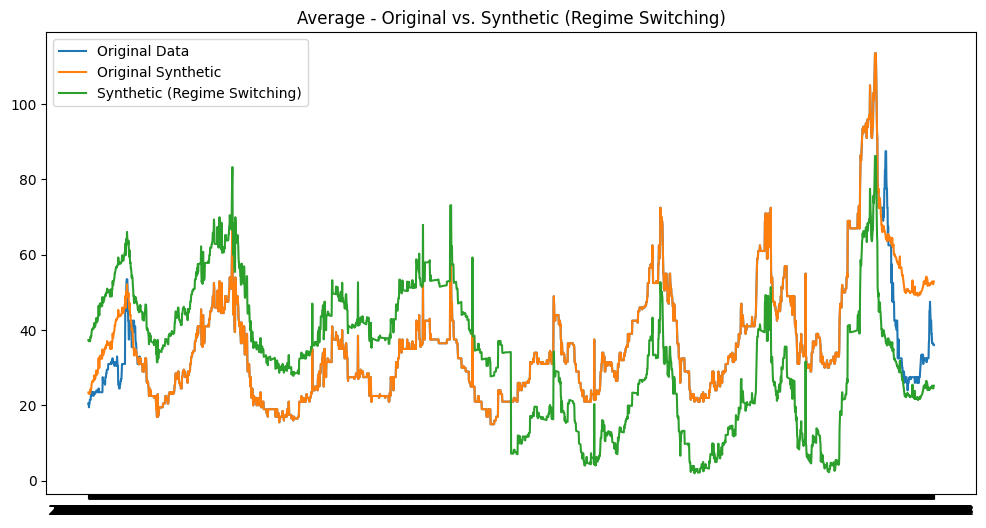

In [12]:
# Visualize variations
for name, dataset in synthetic_datasets.items():
    print(f"Visualizing dataset: {name}")
    for column in dataset.columns:
        if column == 'Average':
            plt.figure(figsize=(12, 6))
            plt.plot(data[column], label='Original Data')
            plt.plot(synthetic_datasets['Original Synthetic'][column], label=f'Original Synthetic')
            plt.plot(dataset[column], label=f'Synthetic ({name})')
            plt.title(f"{column} - Original vs. Synthetic ({name})")
            plt.legend()
            plt.show()

---

In [64]:
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import joblib

## **2.1 Lasso Prediction**

In [65]:
# Function to preprocess data, train, and evaluate the model
def process_and_train(dataset, model, test_size=365):
    # Step 1: Separate features and target
    features = dataset.drop(columns='Average')
    target = dataset[['Average']]
    
    # Step 2: Split the data into training and test sets
    x_train, x_test = features[:-test_size], features[-test_size:]
    y_train, y_test = target[:-test_size], target[-test_size:]
    
    # Step 3: Initialize scalers
    feature_scaler = MinMaxScaler()
    target_scaler = MinMaxScaler()
    
    # Step 4: Fit scalers only on the training set
    x_train_scaled = feature_scaler.fit_transform(x_train)
    y_train_scaled = target_scaler.fit_transform(y_train)
    
    # Step 5: Transform the test set using the scalers fitted on the training data
    x_test_scaled = feature_scaler.transform(x_test)
    y_test_scaled = target_scaler.transform(y_test)
    
    # Step 7: Make predictions and evaluate
    y_pred = model.predict(x_test_scaled)

    
    # Step 8: Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    return mae, y_test, y_pred


            Day  Week  Month  Year  Quarter  Holiday  temperature_2m_max  \
date                                                                       
2013-06-16   16    24      6  2013        2        0           25.404658   
2013-06-17   17    25      6  2013        2        1           24.718082   
2013-06-18   18    25      6  2013        2        0           24.515499   
2013-06-19   19    25      6  2013        2        0           25.041018   
2013-06-20   20    25      6  2013        2        0           24.595890   
...         ...   ...    ...   ...      ...      ...                 ...   
2021-05-09    9    18      5  2021        2        0           29.344932   
2021-05-10   10    19      5  2021        2        0           29.058200   
2021-05-11   11    19      5  2021        2        0           28.299961   
2021-05-12   12    19      5  2021        2        0           27.341566   
2021-05-13   13    19      5  2021        2        0           28.011663   

           

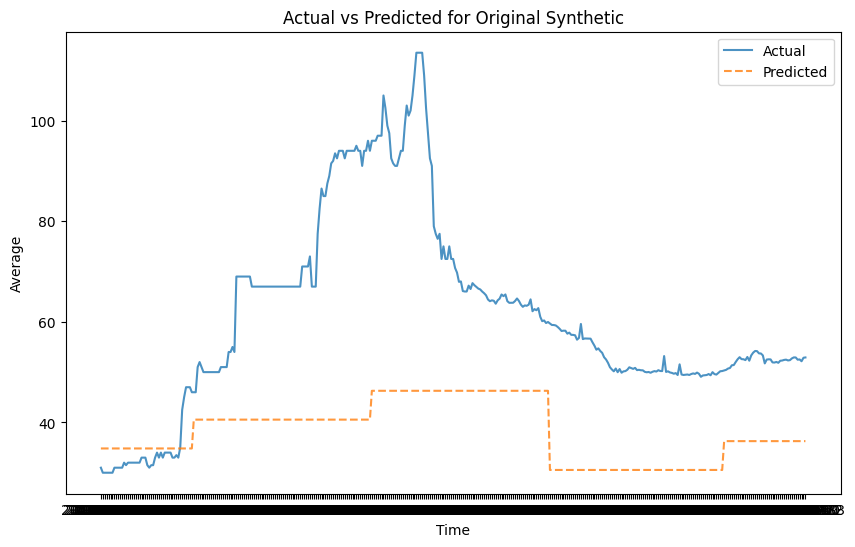

            Day  Week  Month  Year  Quarter  Holiday  temperature_2m_max  \
date                                                                       
2013-06-16   16    24      6  2013        2        0           27.526959   
2013-06-17   17    25      6  2013        2        1           26.840384   
2013-06-18   18    25      6  2013        2        0           26.637800   
2013-06-19   19    25      6  2013        2        0           27.163319   
2013-06-20   20    25      6  2013        2        0           26.718192   
...         ...   ...    ...   ...      ...      ...                 ...   
2021-05-09    9    18      5  2021        2        0           31.659123   
2021-05-10   10    19      5  2021        2        0           31.372391   
2021-05-11   11    19      5  2021        2        0           30.614153   
2021-05-12   12    19      5  2021        2        0           29.655757   
2021-05-13   13    19      5  2021        2        0           30.325855   

           

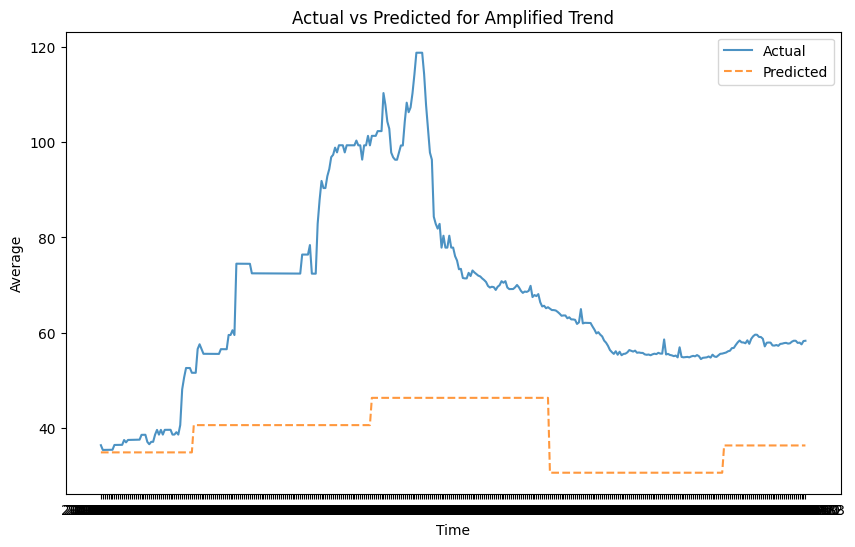

            Day  Week  Month  Year  Quarter  Holiday  temperature_2m_max  \
date                                                                       
2013-06-16   16    24      6  2013        2        0           26.727704   
2013-06-17   17    25      6  2013        2        1           24.599573   
2013-06-18   18    25      6  2013        2        0           25.067004   
2013-06-19   19    25      6  2013        2        0           25.117584   
2013-06-20   20    25      6  2013        2        0           24.780405   
...         ...   ...    ...   ...      ...      ...                 ...   
2021-05-09    9    18      5  2021        2        0           29.269824   
2021-05-10   10    19      5  2021        2        0           28.393589   
2021-05-11   11    19      5  2021        2        0           28.564592   
2021-05-12   12    19      5  2021        2        0           26.751725   
2021-05-13   13    19      5  2021        2        0           27.216762   

           

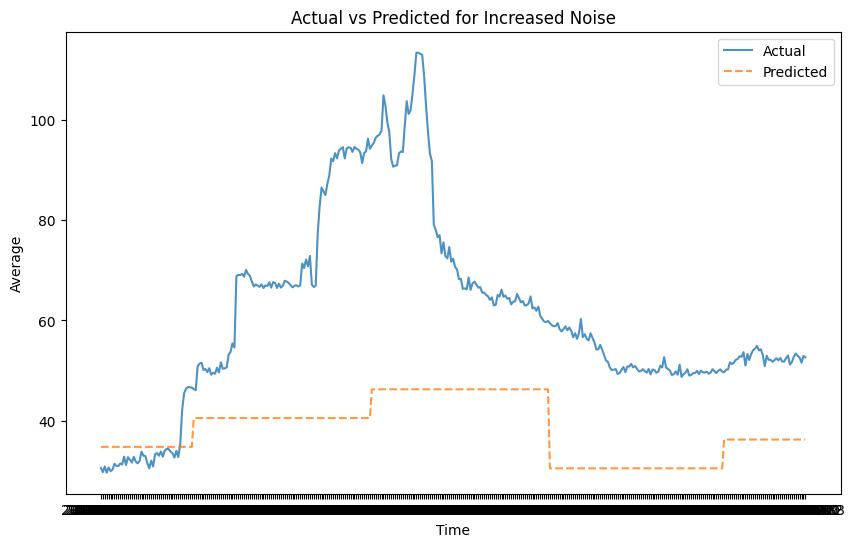

            Day  Week  Month  Year  Quarter  Holiday  temperature_2m_max  \
date                                                                       
2013-06-16   16    24      6  2013        2        0           24.194080   
2013-06-17   17    25      6  2013        2        1           23.713477   
2013-06-18   18    25      6  2013        2        0           23.571669   
2013-06-19   19    25      6  2013        2        0           23.939532   
2013-06-20   20    25      6  2013        2        0           23.627943   
...         ...   ...    ...   ...      ...      ...                 ...   
2021-05-09    9    18      5  2021        2        0           28.123833   
2021-05-10   10    19      5  2021        2        0           27.923121   
2021-05-11   11    19      5  2021        2        0           27.392354   
2021-05-12   12    19      5  2021        2        0           26.721477   
2021-05-13   13    19      5  2021        2        0           27.190546   

           

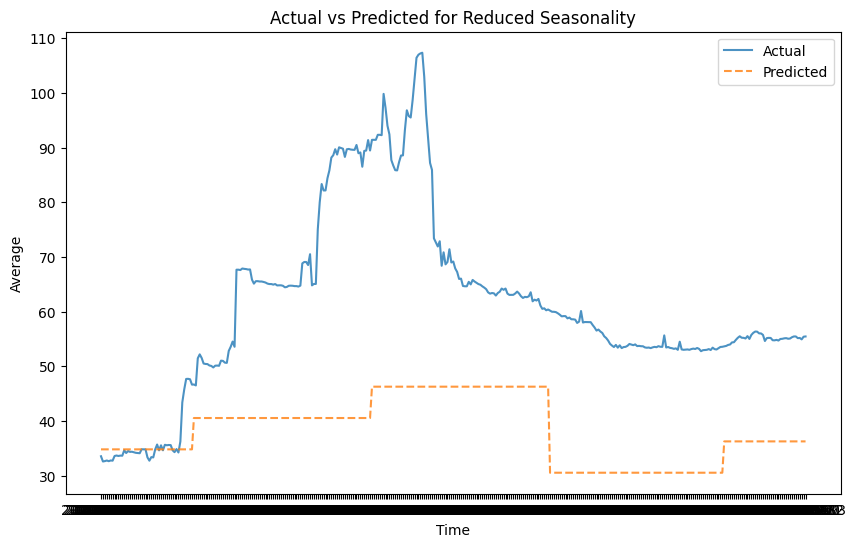

            Day  Week  Month  Year  Quarter  Holiday  temperature_2m_max  \
date                                                                       
2013-06-16   16    24      6  2013        2        0           25.404658   
2013-06-17   17    25      6  2013        2        1           24.718132   
2013-06-18   18    25      6  2013        2        0           24.515699   
2013-06-19   19    25      6  2013        2        0           25.041468   
2013-06-20   20    25      6  2013        2        0           24.596690   
...         ...   ...    ...   ...      ...      ...                 ...   
2021-05-09    9    18      5  2021        2        0          445.217732   
2021-05-10   10    19      5  2021        2        0          445.219450   
2021-05-11   11    19      5  2021        2        0          444.749761   
2021-05-12   12    19      5  2021        2        0          444.080016   
2021-05-13   13    19      5  2021        2        0          445.038863   

           

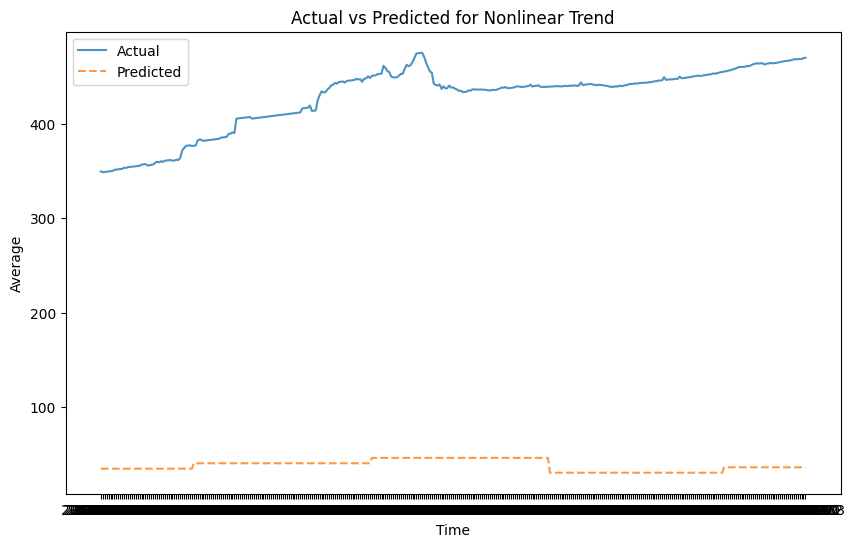

            Day  Week  Month  Year  Quarter  Holiday  temperature_2m_max  \
date                                                                       
2013-06-16   16    24      6  2013        2        0           25.404658   
2013-06-17   17    25      6  2013        2        1           24.718082   
2013-06-18   18    25      6  2013        2        0           24.515499   
2013-06-19   19    25      6  2013        2        0           25.041018   
2013-06-20   20    25      6  2013        2        0           24.595890   
...         ...   ...    ...   ...      ...      ...                 ...   
2021-05-09    9    18      5  2021        2        0           29.344932   
2021-05-10   10    19      5  2021        2        0           29.058200   
2021-05-11   11    19      5  2021        2        0           28.299961   
2021-05-12   12    19      5  2021        2        0           27.341566   
2021-05-13   13    19      5  2021        2        0           28.011663   

           

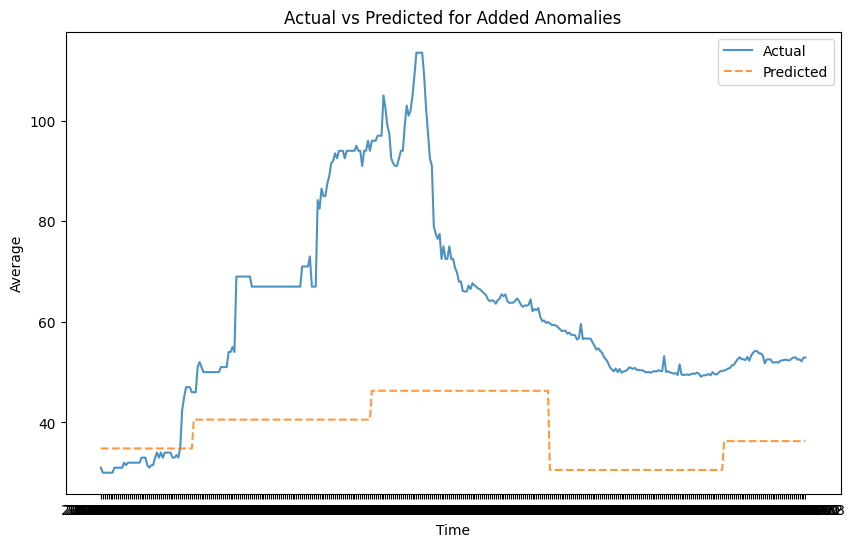

            Day  Week  Month  Year  Quarter  Holiday  temperature_2m_max  \
date                                                                       
2013-06-16   16    24      6  2013        2        0           25.404658   
2013-06-17   17    25      6  2013        2        1           24.718082   
2013-06-18   18    25      6  2013        2        0           24.515499   
2013-06-19   19    25      6  2013        2        0           25.041018   
2013-06-20   20    25      6  2013        2        0           24.595890   
...         ...   ...    ...   ...      ...      ...                 ...   
2021-05-09    9    18      5  2021        2        0           34.331081   
2021-05-10   10    19      5  2021        2        0           34.047812   
2021-05-11   11    19      5  2021        2        0           33.293036   
2021-05-12   12    19      5  2021        2        0           32.338103   
2021-05-13   13    19      5  2021        2        0           33.011663   

           

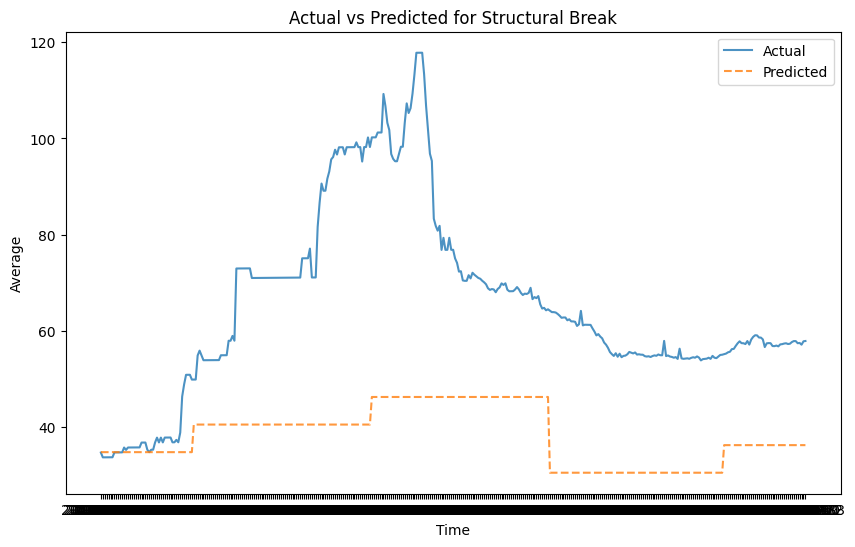

            Day  Week  Month  Year  Quarter  Holiday  temperature_2m_max  \
date                                                                       
2013-06-16   16    24      6  2013        2        0           25.404658   
2013-06-17   17    25      6  2013        2        1           24.718082   
2013-06-18   18    25      6  2013        2        0           24.515499   
2013-06-19   19    25      6  2013        2        0           25.041018   
2013-06-20   20    25      6  2013        2        0           24.595890   
...         ...   ...    ...   ...      ...      ...                 ...   
2021-05-09    9    18      5  2021        2        0           28.501096   
2021-05-10   10    19      5  2021        2        0           28.284892   
2021-05-11   11    19      5  2021        2        0           28.240078   
2021-05-12   12    19      5  2021        2        0           27.839100   
2021-05-13   13    19      5  2021        2        0           28.737926   

           

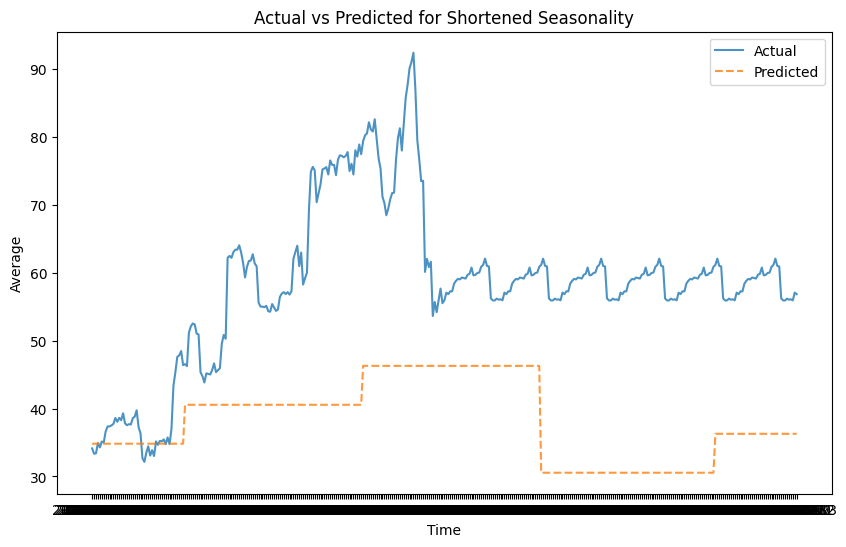

            Day  Week  Month  Year  Quarter  Holiday  temperature_2m_max  \
date                                                                       
2013-06-16   16    24      6  2013        2        0           25.404658   
2013-06-17   17    25      6  2013        2        1           24.718814   
2013-06-18   18    25      6  2013        2        0           24.516963   
2013-06-19   19    25      6  2013        2        0           25.043213   
2013-06-20   20    25      6  2013        2        0           24.598818   
...         ...   ...    ...   ...      ...      ...                 ...   
2021-05-09    9    18      5  2021        2        0           60.098275   
2021-05-10   10    19      5  2021        2        0           59.822207   
2021-05-11   11    19      5  2021        2        0           59.074631   
2021-05-12   12    19      5  2021        2        0           58.126899   
2021-05-13   13    19      5  2021        2        0           58.807661   

           

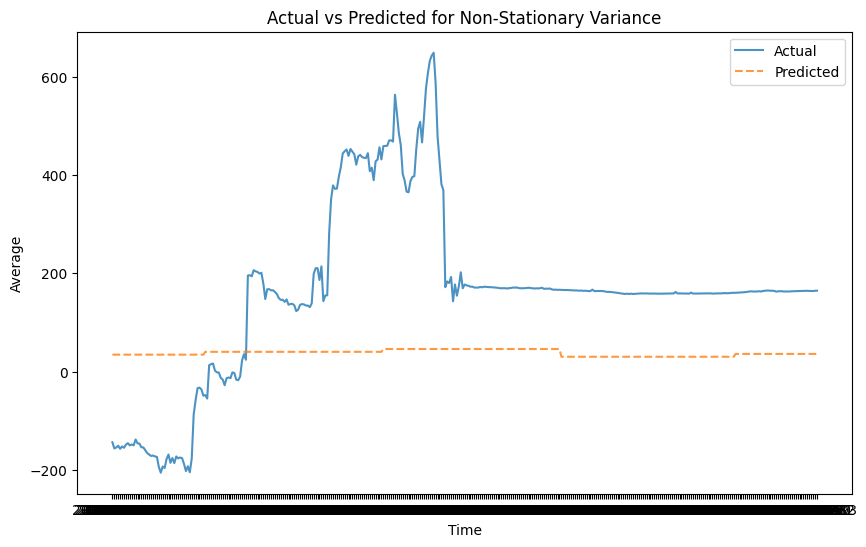

            Day  Week  Month  Year  Quarter  Holiday  temperature_2m_max  \
date                                                                       
2013-06-16   16    24      6  2013        2        0           35.181644   
2013-06-17   17    25      6  2013        2        1           34.495068   
2013-06-18   18    25      6  2013        2        0           34.292485   
2013-06-19   19    25      6  2013        2        0           34.818004   
2013-06-20   20    25      6  2013        2        0           34.372877   
...         ...   ...    ...   ...      ...      ...                 ...   
2021-05-09    9    18      5  2021        2        0           17.203014   
2021-05-10   10    19      5  2021        2        0           16.916282   
2021-05-11   11    19      5  2021        2        0           16.158043   
2021-05-12   12    19      5  2021        2        0           15.199648   
2021-05-13   13    19      5  2021        2        0           15.869746   

           

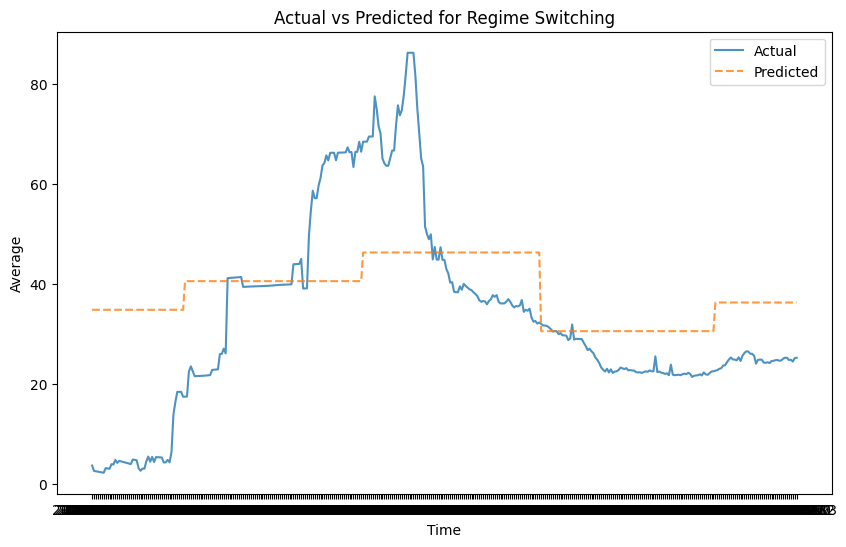

In [66]:
lasso_model = joblib.load('../saved_models/lasso.pkl')

results = {}    

for name, dataset in synthetic_datasets.items():
    mae, y_test_actual, y_pred = process_and_train(dataset, lasso_model)
    results[name] = {
        "MAE": mae,
        "Actual": y_test_actual,
        "Predicted": y_pred,
    }
    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(y_test_actual, label='Actual', alpha=0.8)
    plt.plot(y_pred, label='Predicted', alpha=0.8, linestyle='--')
    plt.title(f'Actual vs Predicted for {name}')
    plt.xlabel('Time')
    plt.ylabel('Average')
    plt.legend()
    plt.show()

In [67]:
# Display summary of results
for name, result in results.items():
    print(f"Dataset: {name}")
    print(f"Mean Absolute Error: {result['MAE']}")
    print("\n")

Dataset: Original Synthetic
Mean Absolute Error: 23.45516895296504


Dataset: Amplified Trend
Mean Absolute Error: 28.228660306804294


Dataset: Increased Noise
Mean Absolute Error: 23.453558462578076


Dataset: Reduced Seasonality
Mean Absolute Error: 23.00683208027043


Dataset: Nonlinear Trend
Mean Absolute Error: 389.5057869909852


Dataset: Added Anomalies
Mean Absolute Error: 23.47346316447511


Dataset: Structural Break
Mean Absolute Error: 27.23588633528038


Dataset: Shortened Seasonality
Mean Absolute Error: 20.09549864630985


Dataset: Non-Stationary Variance
Mean Absolute Error: 176.16991950760254


Dataset: Regime Switching
Mean Absolute Error: 13.295064884635828




---

## **2.2 XGBoost Predicition**

In [68]:
from sklearn.base import BaseEstimator, RegressorMixin
from xgboost import XGBRegressor

class SklearnXGBWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, **kwargs):
        self.model = XGBRegressor(**kwargs)
    
    def fit(self, X, y, **fit_params):
        self.model.fit(X, y, **fit_params)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def get_params(self, deep=True):
        return self.model.get_params(deep=deep)

    def set_params(self, **params):
        self.model.set_params(**params)
        return self

            Day  Week  Month  Year  Quarter  Holiday  temperature_2m_max  \
date                                                                       
2013-06-16   16    24      6  2013        2        0           25.404658   
2013-06-17   17    25      6  2013        2        1           24.718082   
2013-06-18   18    25      6  2013        2        0           24.515499   
2013-06-19   19    25      6  2013        2        0           25.041018   
2013-06-20   20    25      6  2013        2        0           24.595890   
...         ...   ...    ...   ...      ...      ...                 ...   
2021-05-09    9    18      5  2021        2        0           29.344932   
2021-05-10   10    19      5  2021        2        0           29.058200   
2021-05-11   11    19      5  2021        2        0           28.299961   
2021-05-12   12    19      5  2021        2        0           27.341566   
2021-05-13   13    19      5  2021        2        0           28.011663   

           

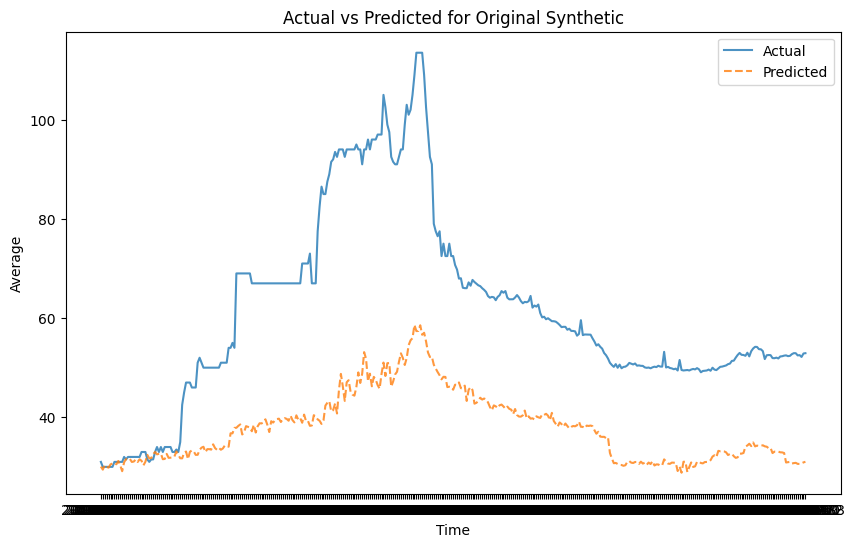

            Day  Week  Month  Year  Quarter  Holiday  temperature_2m_max  \
date                                                                       
2013-06-16   16    24      6  2013        2        0           27.526959   
2013-06-17   17    25      6  2013        2        1           26.840384   
2013-06-18   18    25      6  2013        2        0           26.637800   
2013-06-19   19    25      6  2013        2        0           27.163319   
2013-06-20   20    25      6  2013        2        0           26.718192   
...         ...   ...    ...   ...      ...      ...                 ...   
2021-05-09    9    18      5  2021        2        0           31.659123   
2021-05-10   10    19      5  2021        2        0           31.372391   
2021-05-11   11    19      5  2021        2        0           30.614153   
2021-05-12   12    19      5  2021        2        0           29.655757   
2021-05-13   13    19      5  2021        2        0           30.325855   

           

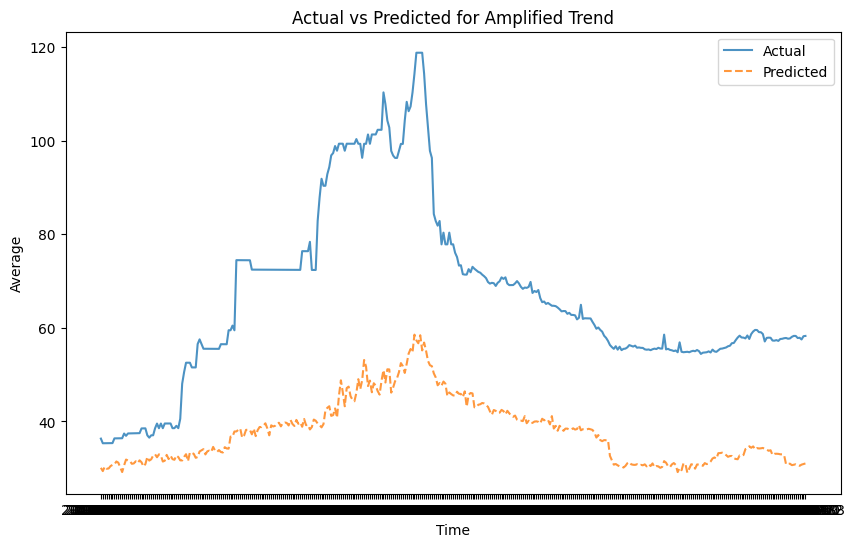

            Day  Week  Month  Year  Quarter  Holiday  temperature_2m_max  \
date                                                                       
2013-06-16   16    24      6  2013        2        0           26.727704   
2013-06-17   17    25      6  2013        2        1           24.599573   
2013-06-18   18    25      6  2013        2        0           25.067004   
2013-06-19   19    25      6  2013        2        0           25.117584   
2013-06-20   20    25      6  2013        2        0           24.780405   
...         ...   ...    ...   ...      ...      ...                 ...   
2021-05-09    9    18      5  2021        2        0           29.269824   
2021-05-10   10    19      5  2021        2        0           28.393589   
2021-05-11   11    19      5  2021        2        0           28.564592   
2021-05-12   12    19      5  2021        2        0           26.751725   
2021-05-13   13    19      5  2021        2        0           27.216762   

           

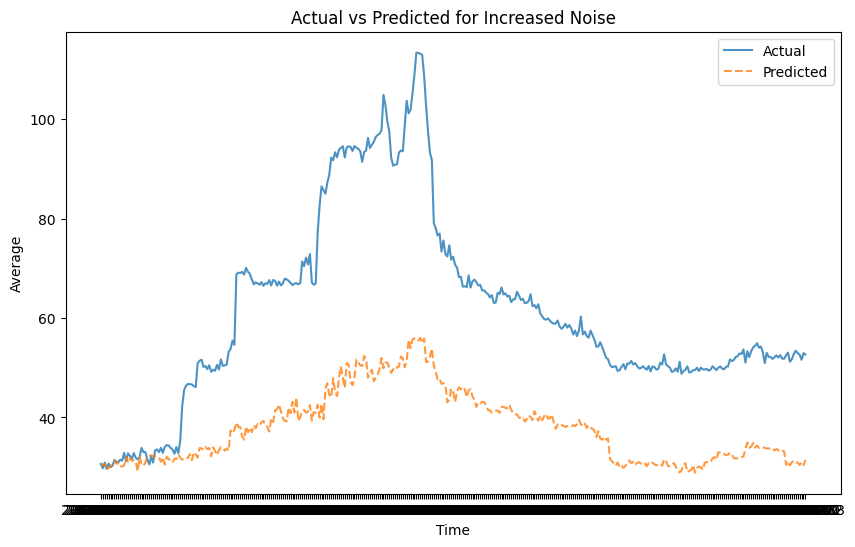

            Day  Week  Month  Year  Quarter  Holiday  temperature_2m_max  \
date                                                                       
2013-06-16   16    24      6  2013        2        0           24.194080   
2013-06-17   17    25      6  2013        2        1           23.713477   
2013-06-18   18    25      6  2013        2        0           23.571669   
2013-06-19   19    25      6  2013        2        0           23.939532   
2013-06-20   20    25      6  2013        2        0           23.627943   
...         ...   ...    ...   ...      ...      ...                 ...   
2021-05-09    9    18      5  2021        2        0           28.123833   
2021-05-10   10    19      5  2021        2        0           27.923121   
2021-05-11   11    19      5  2021        2        0           27.392354   
2021-05-12   12    19      5  2021        2        0           26.721477   
2021-05-13   13    19      5  2021        2        0           27.190546   

           

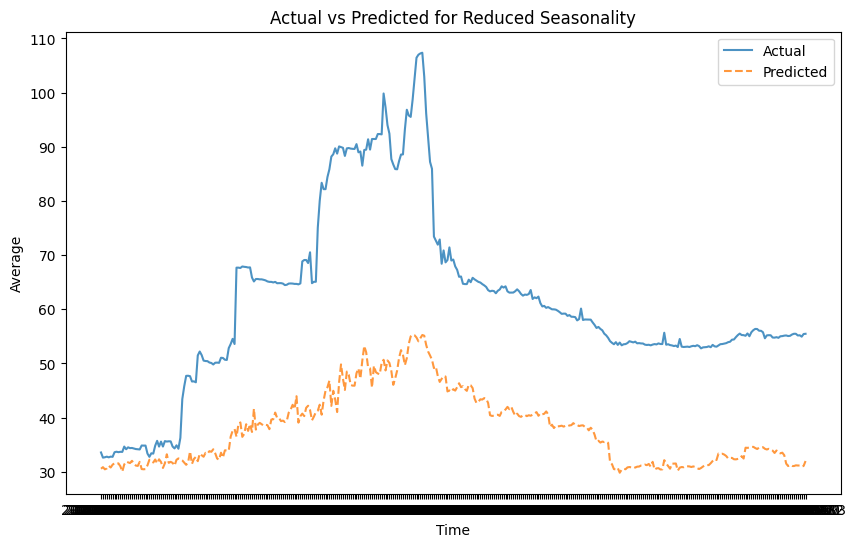

            Day  Week  Month  Year  Quarter  Holiday  temperature_2m_max  \
date                                                                       
2013-06-16   16    24      6  2013        2        0           25.404658   
2013-06-17   17    25      6  2013        2        1           24.718132   
2013-06-18   18    25      6  2013        2        0           24.515699   
2013-06-19   19    25      6  2013        2        0           25.041468   
2013-06-20   20    25      6  2013        2        0           24.596690   
...         ...   ...    ...   ...      ...      ...                 ...   
2021-05-09    9    18      5  2021        2        0          445.217732   
2021-05-10   10    19      5  2021        2        0          445.219450   
2021-05-11   11    19      5  2021        2        0          444.749761   
2021-05-12   12    19      5  2021        2        0          444.080016   
2021-05-13   13    19      5  2021        2        0          445.038863   

           

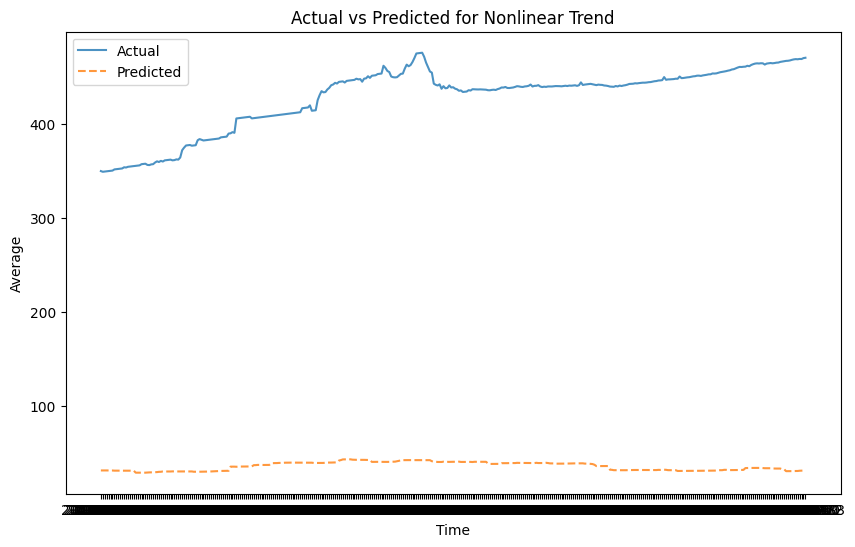

            Day  Week  Month  Year  Quarter  Holiday  temperature_2m_max  \
date                                                                       
2013-06-16   16    24      6  2013        2        0           25.404658   
2013-06-17   17    25      6  2013        2        1           24.718082   
2013-06-18   18    25      6  2013        2        0           24.515499   
2013-06-19   19    25      6  2013        2        0           25.041018   
2013-06-20   20    25      6  2013        2        0           24.595890   
...         ...   ...    ...   ...      ...      ...                 ...   
2021-05-09    9    18      5  2021        2        0           29.344932   
2021-05-10   10    19      5  2021        2        0           29.058200   
2021-05-11   11    19      5  2021        2        0           28.299961   
2021-05-12   12    19      5  2021        2        0           27.341566   
2021-05-13   13    19      5  2021        2        0           28.011663   

           

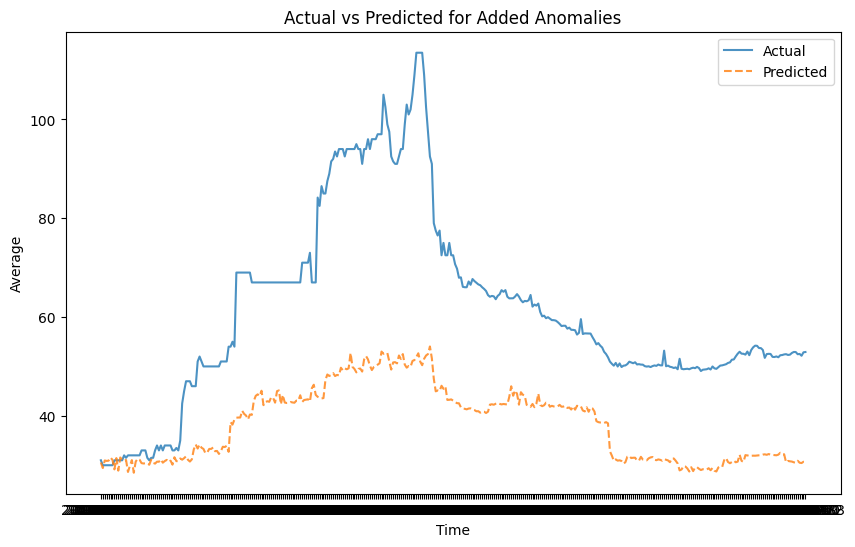

            Day  Week  Month  Year  Quarter  Holiday  temperature_2m_max  \
date                                                                       
2013-06-16   16    24      6  2013        2        0           25.404658   
2013-06-17   17    25      6  2013        2        1           24.718082   
2013-06-18   18    25      6  2013        2        0           24.515499   
2013-06-19   19    25      6  2013        2        0           25.041018   
2013-06-20   20    25      6  2013        2        0           24.595890   
...         ...   ...    ...   ...      ...      ...                 ...   
2021-05-09    9    18      5  2021        2        0           34.331081   
2021-05-10   10    19      5  2021        2        0           34.047812   
2021-05-11   11    19      5  2021        2        0           33.293036   
2021-05-12   12    19      5  2021        2        0           32.338103   
2021-05-13   13    19      5  2021        2        0           33.011663   

           

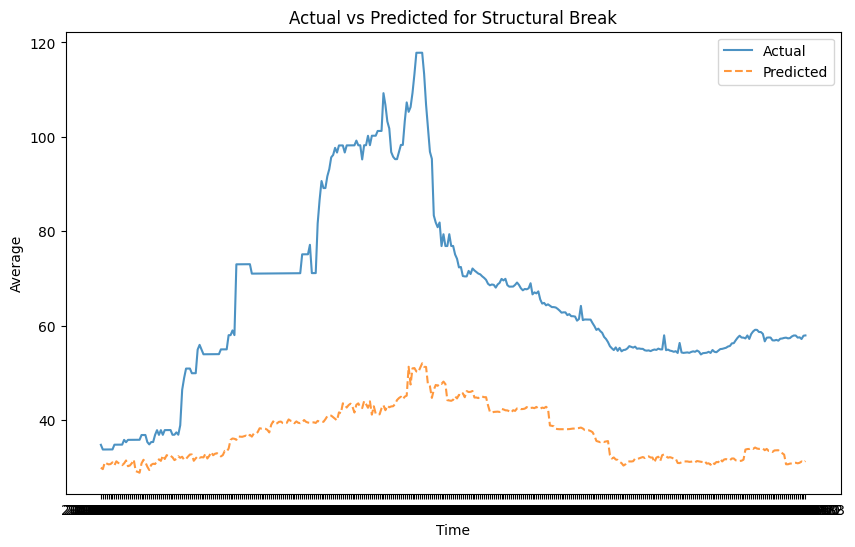

            Day  Week  Month  Year  Quarter  Holiday  temperature_2m_max  \
date                                                                       
2013-06-16   16    24      6  2013        2        0           25.404658   
2013-06-17   17    25      6  2013        2        1           24.718082   
2013-06-18   18    25      6  2013        2        0           24.515499   
2013-06-19   19    25      6  2013        2        0           25.041018   
2013-06-20   20    25      6  2013        2        0           24.595890   
...         ...   ...    ...   ...      ...      ...                 ...   
2021-05-09    9    18      5  2021        2        0           28.501096   
2021-05-10   10    19      5  2021        2        0           28.284892   
2021-05-11   11    19      5  2021        2        0           28.240078   
2021-05-12   12    19      5  2021        2        0           27.839100   
2021-05-13   13    19      5  2021        2        0           28.737926   

           

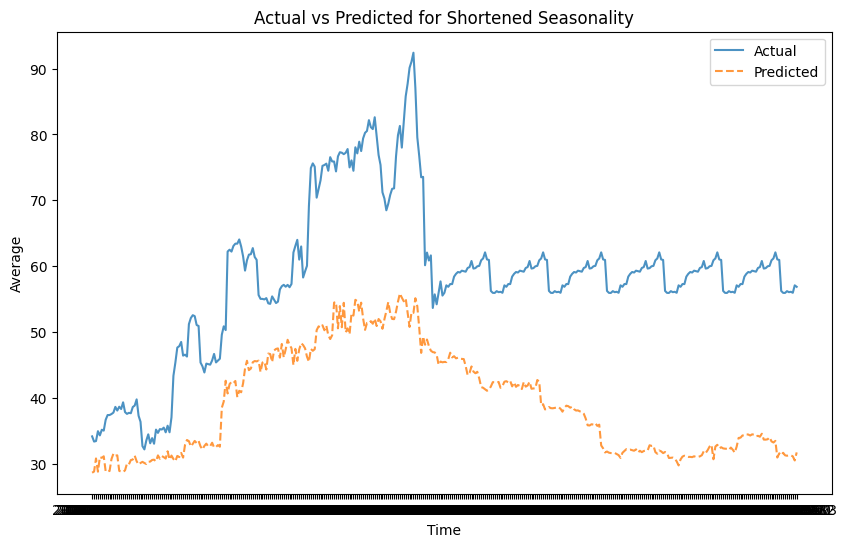

            Day  Week  Month  Year  Quarter  Holiday  temperature_2m_max  \
date                                                                       
2013-06-16   16    24      6  2013        2        0           25.404658   
2013-06-17   17    25      6  2013        2        1           24.718814   
2013-06-18   18    25      6  2013        2        0           24.516963   
2013-06-19   19    25      6  2013        2        0           25.043213   
2013-06-20   20    25      6  2013        2        0           24.598818   
...         ...   ...    ...   ...      ...      ...                 ...   
2021-05-09    9    18      5  2021        2        0           60.098275   
2021-05-10   10    19      5  2021        2        0           59.822207   
2021-05-11   11    19      5  2021        2        0           59.074631   
2021-05-12   12    19      5  2021        2        0           58.126899   
2021-05-13   13    19      5  2021        2        0           58.807661   

           

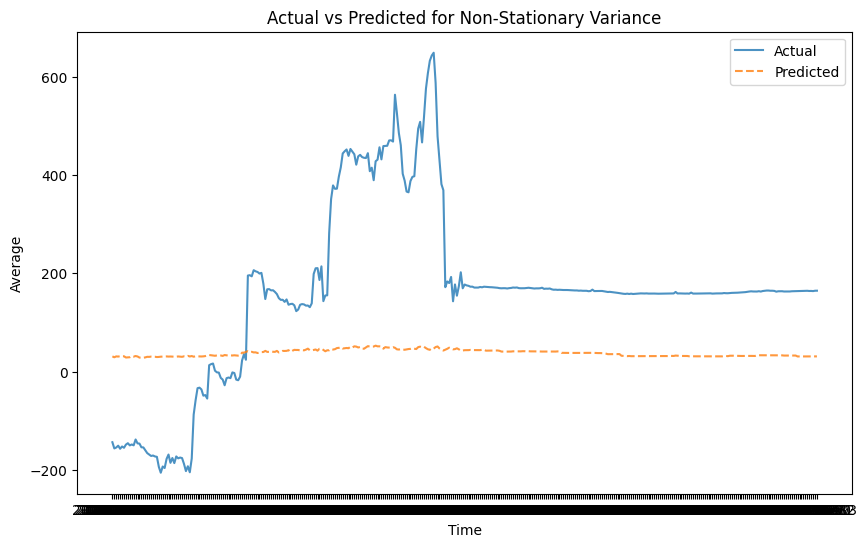

            Day  Week  Month  Year  Quarter  Holiday  temperature_2m_max  \
date                                                                       
2013-06-16   16    24      6  2013        2        0           35.181644   
2013-06-17   17    25      6  2013        2        1           34.495068   
2013-06-18   18    25      6  2013        2        0           34.292485   
2013-06-19   19    25      6  2013        2        0           34.818004   
2013-06-20   20    25      6  2013        2        0           34.372877   
...         ...   ...    ...   ...      ...      ...                 ...   
2021-05-09    9    18      5  2021        2        0           17.203014   
2021-05-10   10    19      5  2021        2        0           16.916282   
2021-05-11   11    19      5  2021        2        0           16.158043   
2021-05-12   12    19      5  2021        2        0           15.199648   
2021-05-13   13    19      5  2021        2        0           15.869746   

           

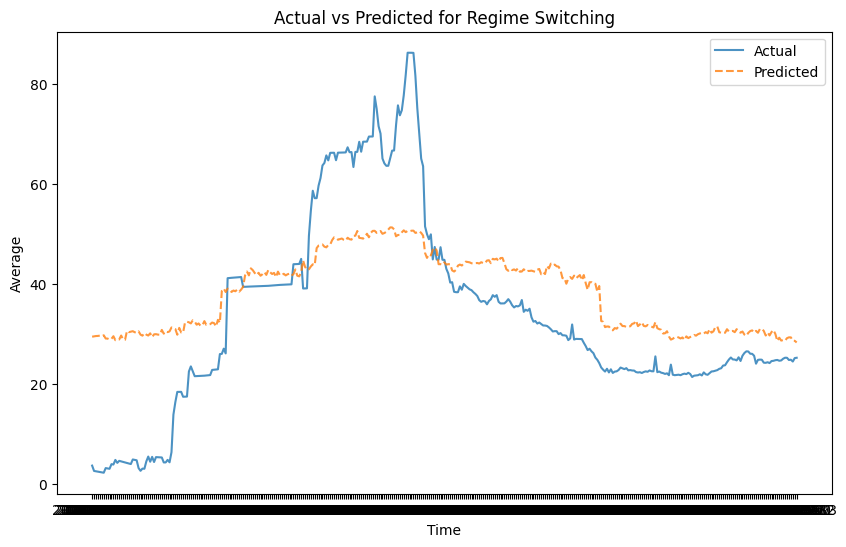

In [69]:
xgboost_model = joblib.load('../saved_models/xgboost.pkl')

results = {}    

for name, dataset in synthetic_datasets.items():
    mae, y_test_actual, y_pred = process_and_train(dataset, xgboost_model)
    results[name] = {
        "MAE": mae,
        "Actual": y_test_actual,
        "Predicted": y_pred,
    }
    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(y_test_actual, label='Actual', alpha=0.8)
    plt.plot(y_pred, label='Predicted', alpha=0.8, linestyle='--')
    plt.title(f'Actual vs Predicted for {name}')
    plt.xlabel('Time')
    plt.ylabel('Average')
    plt.legend()
    plt.show()

In [70]:
# Display summary of results
for name, result in results.items():
    print(f"Dataset: {name}")
    print(f"Mean Absolute Error: {result['MAE']}")
    print("\n")

Dataset: Original Synthetic
Mean Absolute Error: 23.282184600830078


Dataset: Amplified Trend
Mean Absolute Error: 28.672990798950195


Dataset: Increased Noise
Mean Absolute Error: 23.226036071777344


Dataset: Reduced Seasonality
Mean Absolute Error: 23.144287109375


Dataset: Nonlinear Trend
Mean Absolute Error: 391.9951171875


Dataset: Added Anomalies
Mean Absolute Error: 22.783788681030273


Dataset: Structural Break
Mean Absolute Error: 28.452362060546875


Dataset: Shortened Seasonality
Mean Absolute Error: 19.16840171813965


Dataset: Non-Stationary Variance
Mean Absolute Error: 174.43873596191406


Dataset: Regime Switching
Mean Absolute Error: 11.259852409362793




In [71]:
def create_sequences(x, y, time_steps):
    sequences_x, sequences_y = [], []
    for i in range(len(x) - time_steps):
        sequences_x.append(x[i:i + time_steps])  # Use time_steps rows of features
        sequences_y.append(y[i + time_steps])   # Predict the target at the next step
    return np.array(sequences_x), np.array(sequences_y)

In [72]:
# Function to preprocess data, train, and evaluate the model
def process_and_train_lstm(dataset, model, test_size=365):
    # Define the number of time steps
    time_steps = 7

    features = dataset.drop(columns='Average') 
    target = dataset[['Average']]  # Target column

    # Step 2: Split the data into training and test sets
    test_size = 365 + time_steps
    x_train, x_test = features[:-test_size], features[-test_size:]
    y_train, y_test = target[:-test_size], target[-test_size:]

    # Step 3: Initialize scalers
    feature_scaler = MinMaxScaler()
    target_scaler = MinMaxScaler()

    # Step 4: Fit scalers only on the training set
    x_train_scaled = feature_scaler.fit_transform(x_train)
    y_train_scaled = target_scaler.fit_transform(y_train)

    # Step 5: Transform the test set using the scalers fitted on the training data
    x_test_scaled = feature_scaler.transform(x_test)
    y_test_scaled = target_scaler.transform(y_test)

    # Create sequences
    x_train_seq, y_train_seq = create_sequences(x_train_scaled, y_train_scaled, time_steps)
    x_test_seq, y_test_seq = create_sequences(x_test_scaled, y_test_scaled, time_steps)
    
    # Step 7: Make predictions and evaluate
    # Step 10: Predict on the test set
    y_pred_scaled = model.predict(x_test_seq)

    # Step 11: Inverse transform the predictions
    y_pred = target_scaler.inverse_transform(y_pred_scaled)
    y_test = target_scaler.inverse_transform(y_test_seq)    

    # Step 8: Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    return mae, y_test, y_pred

c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 16 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step


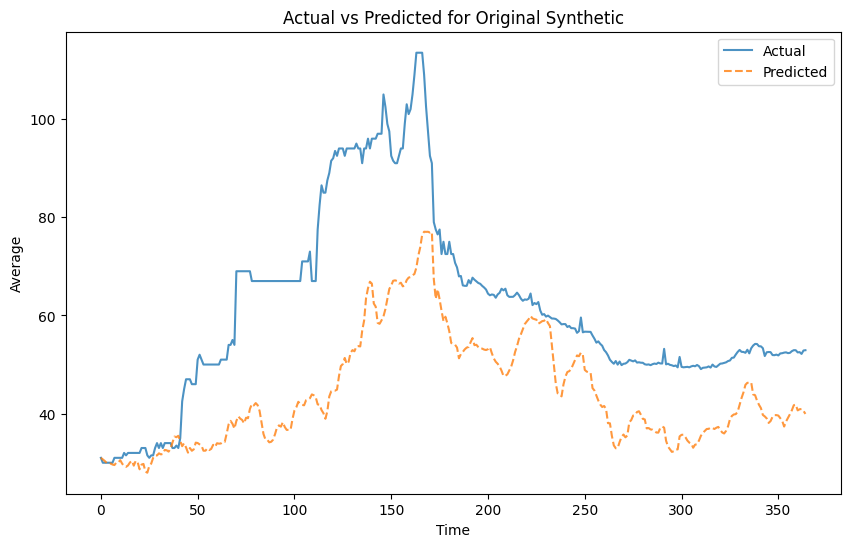

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


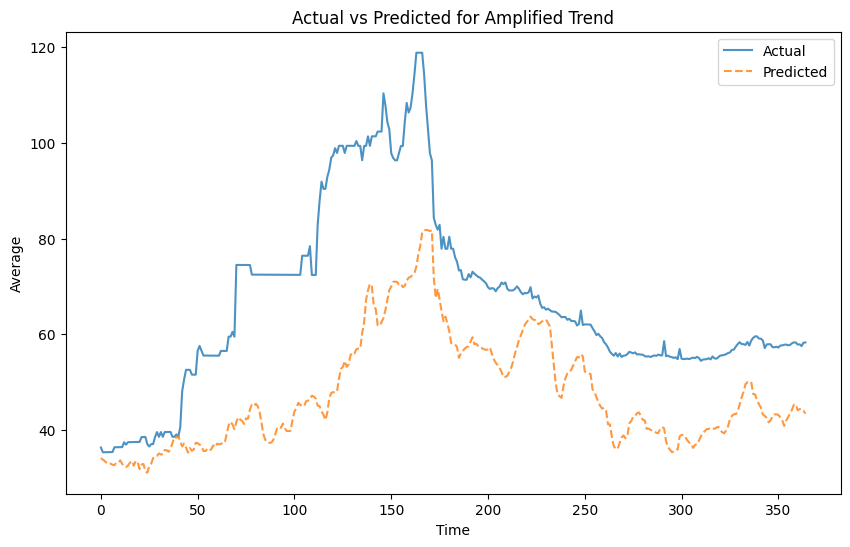

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


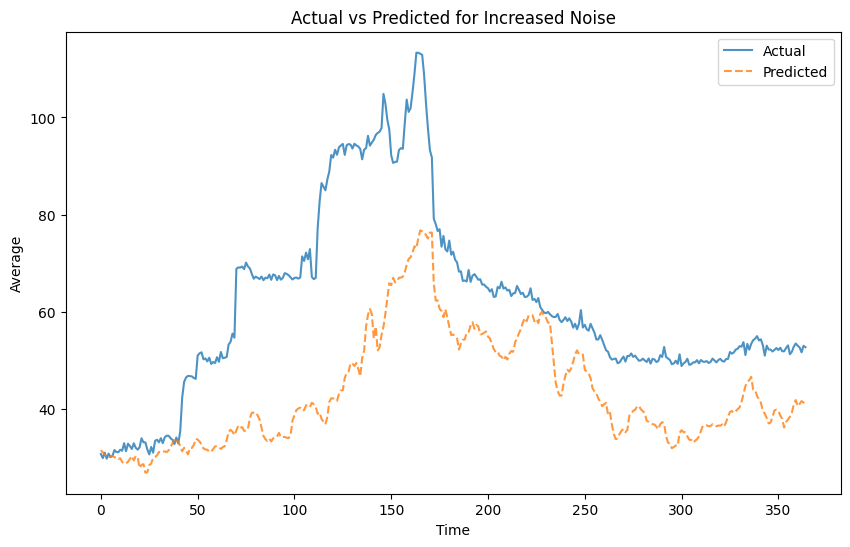

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


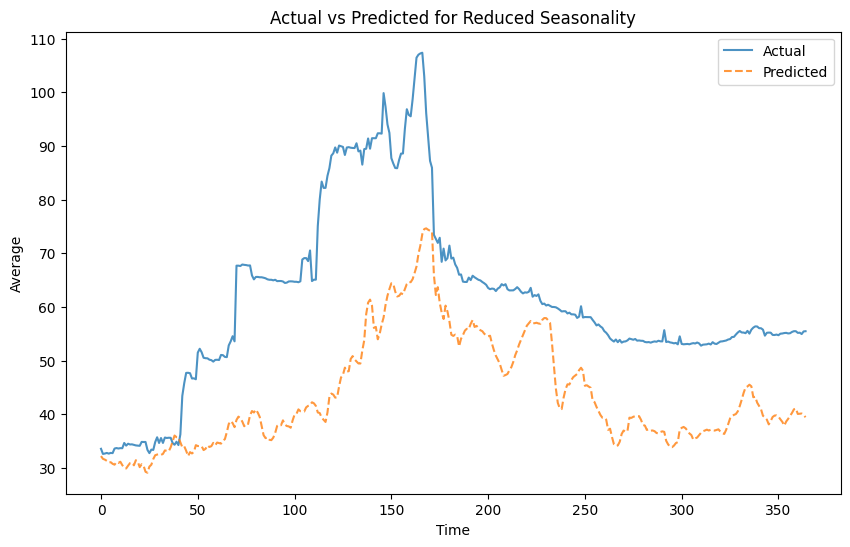

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


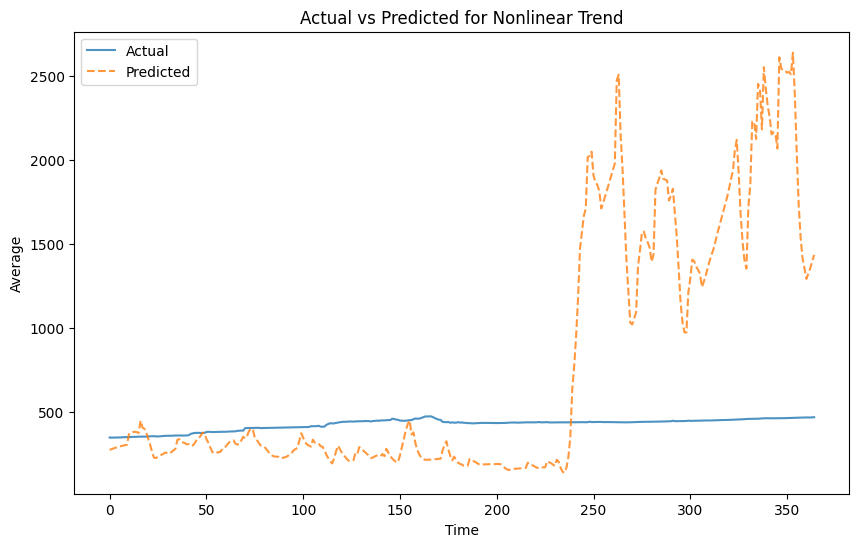

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


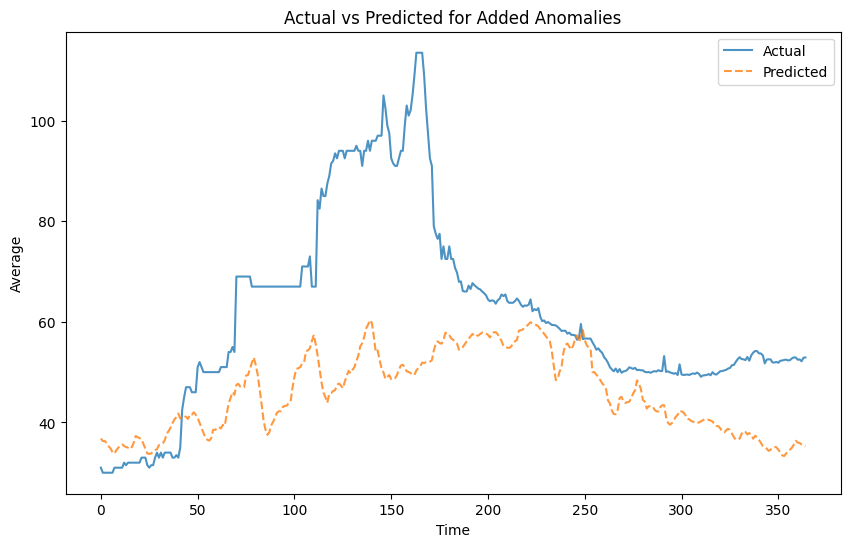

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


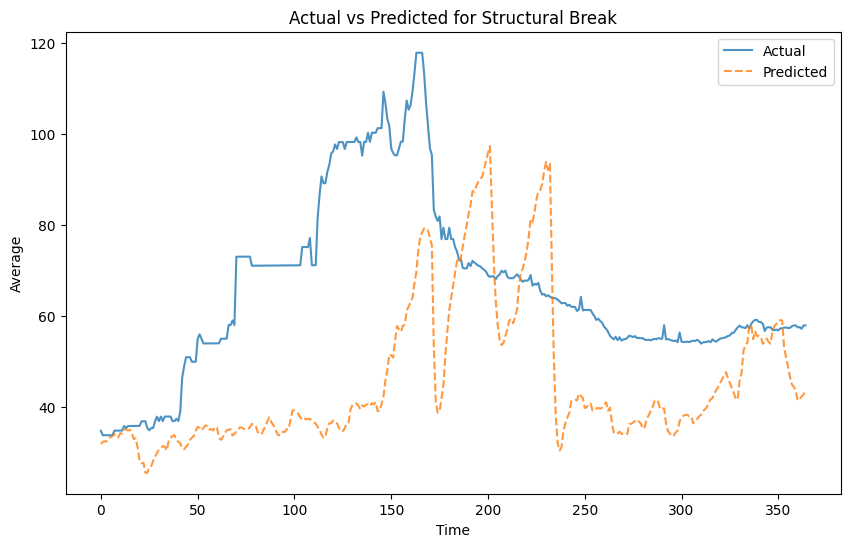

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


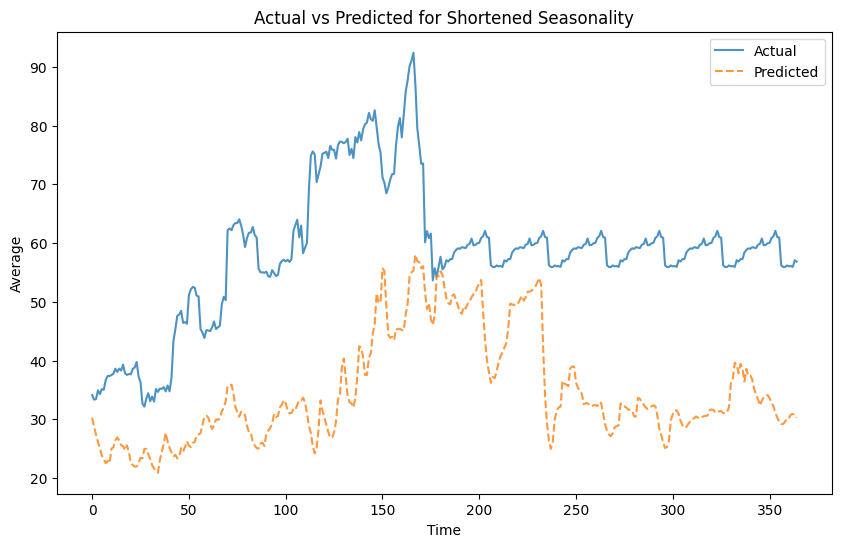

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


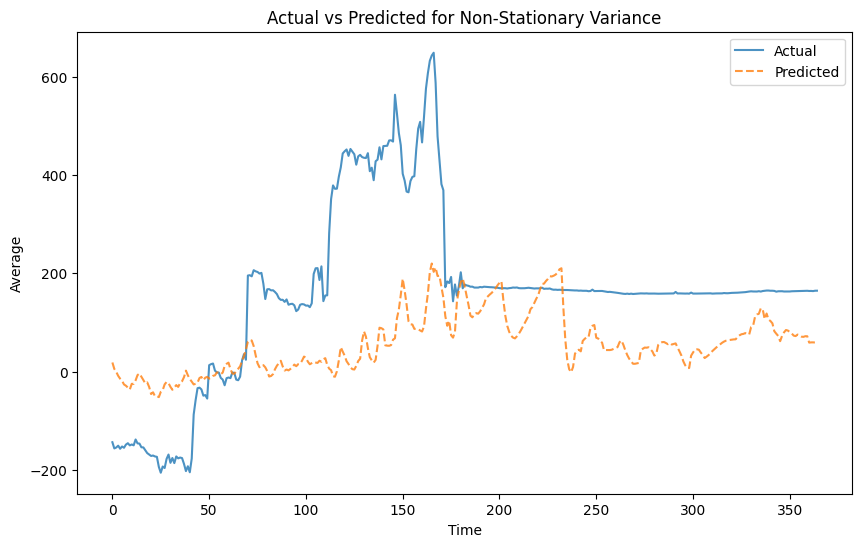

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


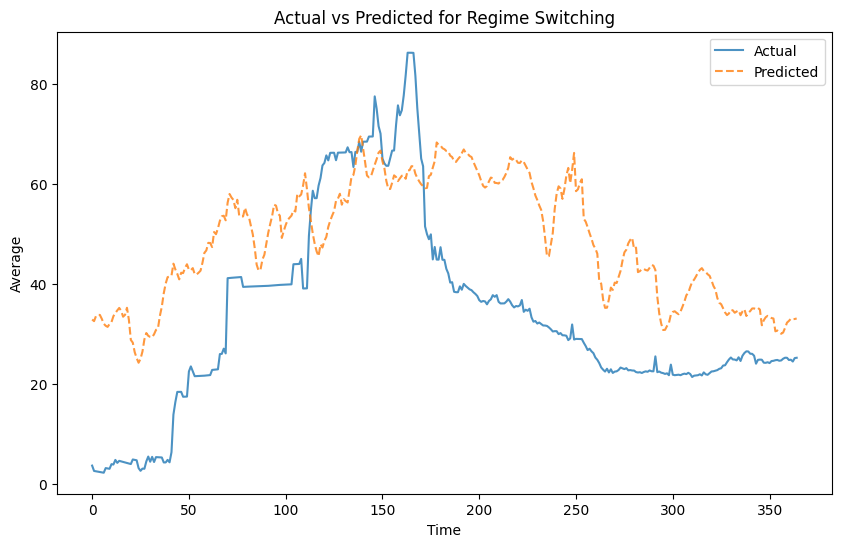

In [76]:
from tensorflow.keras.models import load_model

# Load the model
lstm_model = load_model('../saved_models/lstm.keras')

results = {}    

for name, dataset in synthetic_datasets.items():
    mae, y_test_actual, y_pred = process_and_train_lstm(dataset, lstm_model)
    results[name] = {
        "MAE": mae,
        "Actual": y_test_actual,
        "Predicted": y_pred,
    }
    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(y_test_actual, label='Actual', alpha=0.8)
    plt.plot(y_pred, label='Predicted', alpha=0.8, linestyle='--')
    plt.title(f'Actual vs Predicted for {name}')
    plt.xlabel('Time')
    plt.ylabel('Average')
    plt.legend()
    plt.show()

In [77]:
# Display summary of results
for name, result in results.items():
    print(f"Dataset: {name}")
    print(f"Mean Absolute Error: {result['MAE']}")
    print("\n")

Dataset: Original Synthetic
Mean Absolute Error: 17.020146256007884


Dataset: Amplified Trend
Mean Absolute Error: 18.966685190398774


Dataset: Increased Noise
Mean Absolute Error: 17.833222138408953


Dataset: Reduced Seasonality
Mean Absolute Error: 17.510079091931342


Dataset: Nonlinear Trend
Mean Absolute Error: 542.005361204815


Dataset: Added Anomalies
Mean Absolute Error: 16.128505156156717


Dataset: Structural Break
Mean Absolute Error: 22.659443660258155


Dataset: Shortened Seasonality
Mean Absolute Error: 23.468030914526704


Dataset: Non-Stationary Variance
Mean Absolute Error: 140.44029196081993


Dataset: Regime Switching
Mean Absolute Error: 18.207339939741615


